In [1]:
#importing basic libraries

import pandas as pd
import numpy as np
import time

# visual libraries
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')

# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import normalize, LabelEncoder, StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve

#Imbalance handling libraries
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import ADASYN, SMOTE

#other required libraries
import haversine as hs
from haversine import Unit
from joblib import dump

#Tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

#To supress the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the training and testing set data into the dataframe
dataset_train=pd.read_csv("fraudTrain.csv")
dataset_test=pd.read_csv("fraudTest.csv")

In [3]:
dataset_train.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [4]:
dataset_test.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [5]:
dataset_train.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
dataset_test.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
dataset_train.shape,dataset_test.shape

((1296675, 23), (555719, 23))

In [8]:
dataset_train.info(),dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

(None, None)

In [9]:
dataset_train.drop_duplicates(subset=None, inplace=True)

In [10]:
dataset_train.shape

(1296675, 23)

In [11]:
dataset_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [12]:
column=dataset_train.columns
column

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [13]:
for col in column:
    print(dataset_train[col].value_counts())

0          1
864447     1
864454     1
864453     1
864452     1
          ..
432224     1
432223     1
432222     1
432221     1
1296674    1
Name: Unnamed: 0, Length: 1296675, dtype: int64
2019-04-22 16:02:01    4
2020-06-01 01:37:47    4
2020-06-02 12:47:07    4
2019-11-18 23:03:49    3
2019-12-01 14:11:58    3
                      ..
2019-07-13 18:38:18    1
2019-07-13 18:37:26    1
2019-07-13 18:35:46    1
2019-07-13 18:35:41    1
2020-06-21 12:13:37    1
Name: trans_date_trans_time, Length: 1274791, dtype: int64
571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: cc_num, Length: 983, dtype: int64
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                     

In [14]:
#Performing Exploratory analysis
#Merging first and last names and dropping original column

dataset_train['Name']=dataset_train['first']+' '+dataset_train['last']
dataset_test['Name']=dataset_test['first']+' '+dataset_test['last']

In [15]:
# Checking and dropping unwanted columns

dataset_train.drop(['Unnamed: 0','first','last'],axis=1, inplace=True)
dataset_test.drop(['Unnamed: 0','first','last'],axis=1, inplace=True)

In [16]:
#Modifying Datatypes for time and date columns and converting to datetime format

dataset_train['trans_date_trans_time'] = pd.to_datetime(dataset_train['trans_date_trans_time'], errors='coerce')
dataset_train['dob'] = pd.to_datetime(dataset_train['dob'], errors='coerce')
dataset_train['unix_time'] = pd.to_datetime(dataset_train['unix_time'], errors='coerce')

dataset_test['trans_date_trans_time'] = pd.to_datetime(dataset_test['trans_date_trans_time'], errors='coerce')
dataset_test['dob'] = pd.to_datetime(dataset_test['dob'], errors='coerce')
dataset_test['unix_time'] = pd.to_datetime(dataset_test['unix_time'], errors='coerce')

In [17]:
#Converting dob to age and removing dob column

dataset_train['Transaction_Date'] = (dataset_train['trans_date_trans_time']).dt.date.astype('datetime64[ns]')
dataset_train['age'] = dataset_train['Transaction_Date'].dt.year - dataset_train['dob'].dt.year
dataset_train.drop('dob',1,inplace=True)

dataset_test['Transaction_Date'] = (dataset_test['trans_date_trans_time']).dt.date.astype('datetime64[ns]')
dataset_test['age'] = dataset_test['Transaction_Date'].dt.year - dataset_test['dob'].dt.year
dataset_test.drop('dob',1,inplace=True)

In [18]:
#Creating new columns for the age group

bins=[0,19,31,41,51,61,90]
slot=['0-18','19-30','31-40','41-50','51-60','>61']
dataset_train["age_range"]=pd.cut(dataset_train["age"],bins,labels=slot)

bins=[0,19,31,41,51,61,90]
slot=['0-18','19-30','31-40','41-50','51-60','>61']
dataset_test["age_range"]=pd.cut(dataset_test["age"],bins,labels=slot)

In [19]:
#Creating new columns by splitting time and date columns

dataset_train['trans_year']=pd.DatetimeIndex(dataset_train['trans_date_trans_time']).year
dataset_train['trans_month']=pd.DatetimeIndex(dataset_train['trans_date_trans_time']).month
dataset_train['trans_time']=pd.DatetimeIndex(dataset_train['trans_date_trans_time']).hour

dataset_test['trans_year']=pd.DatetimeIndex(dataset_test['trans_date_trans_time']).year
dataset_test['trans_month']=pd.DatetimeIndex(dataset_test['trans_date_trans_time']).month
dataset_test['trans_time']=pd.DatetimeIndex(dataset_test['trans_date_trans_time']).hour

In [20]:
#Creating month name from the month value

import calendar
dataset_train['Month_name'] = dataset_train['trans_month'].apply(lambda x: calendar.month_abbr[x])
dataset_test['Month_name'] = dataset_test['trans_month'].apply(lambda x: calendar.month_abbr[x])

In [21]:
def haversine_np(lon1, lat1, lon2, lat2):
  lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
  c = 2 * np.arcsin(np.sqrt(a))
  km = 6371 * c  #6367
  return km

In [22]:
#Distance between people co-ord and merchant co-ord
dataset_train['distance_people_to_merchant_co-ord(kms)'] = haversine_np(dataset_train['long'],dataset_train['lat'],dataset_train['merch_long'],dataset_train['merch_lat'])

#longitude first, latitude second
dataset_test['distance_people_to_merchant_co-ord(kms)'] = haversine_np(dataset_test['long'],dataset_test['lat'],dataset_test['merch_long'],dataset_test['merch_lat'])

In [26]:
dataset_train.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,is_fraud,Name,Transaction_Date,age,age_range,trans_year,trans_month,trans_time,Month_name,distance_people_to_merchant_co-ord(kms)
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,...,0,Jennifer Banks,2019-01-01,31,19-30,2019,1,0,Jan,78.597568
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,...,0,Stephanie Gill,2019-01-01,41,31-40,2019,1,0,Jan,30.212176
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,...,0,Edward Sanchez,2019-01-01,57,51-60,2019,1,0,Jan,108.206083
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,...,0,Jeremy White,2019-01-01,52,51-60,2019,1,0,Jan,95.673231
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,...,0,Tyler Garcia,2019-01-01,33,31-40,2019,1,0,Jan,77.556744


In [27]:
dataset_train['distance_people_to_merchant_co-ord(kms)'].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

count    1.296675e+06
mean     7.611465e+01
std      2.911693e+01
min      2.225452e-02
1%       1.109684e+01
5%       2.474071e+01
25%      5.533491e+01
50%      7.823175e+01
75%      9.850327e+01
95%      1.204954e+02
99%      1.320528e+02
max      1.521172e+02
Name: distance_people_to_merchant_co-ord(kms), dtype: float64

In [28]:
object_columns=dataset_train.select_dtypes(include=['object'])
object_columns

,merchant,category,gender,street,city,state,job,trans_num,Name,Month_name
0,"fraud_Rippin, Kub and Mann",misc_net,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",0b242abb623afc578575680df30655b9,Jennifer Banks,Jan
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1f76529f8574734946361c461b024d99,Stephanie Gill,Jan
2,fraud_Lind-Buckridge,entertainment,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,Edward Sanchez,Jan
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,6b849c168bdad6f867558c3793159a81,Jeremy White,Jan
4,fraud_Keeling-Crist,misc_pos,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,Tyler Garcia,Jan
...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,M,162 Jessica Row Apt. 072,Hatch,UT,Geoscientist,440b587732da4dc1a6395aba5fb41669,Erik Patterson,Jun
1296671,fraud_Abernathy and Sons,food_dining,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,Jeffrey White,Jun
1296672,fraud_Stiedemann Ltd,food_dining,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,Naval architect,483f52fe67fabef353d552c1e662974c,Christopher Castaneda,Jun
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,M,42933 Ryan Underpass,Manderson,SD,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,Joseph Murray,Jun


In [29]:
#Seperating the fraud and non-fraud records for further analysis
fraud_train_cases=dataset_train[dataset_train['is_fraud']==1]
non_fraud_train_cases=dataset_train[dataset_train['is_fraud']==0]

#Seperating the fraud and non-fraud records for further analysis
fraud_test_cases=dataset_test[dataset_test['is_fraud']==1]
non_fraud_test_cases=dataset_test[dataset_test['is_fraud']==0]

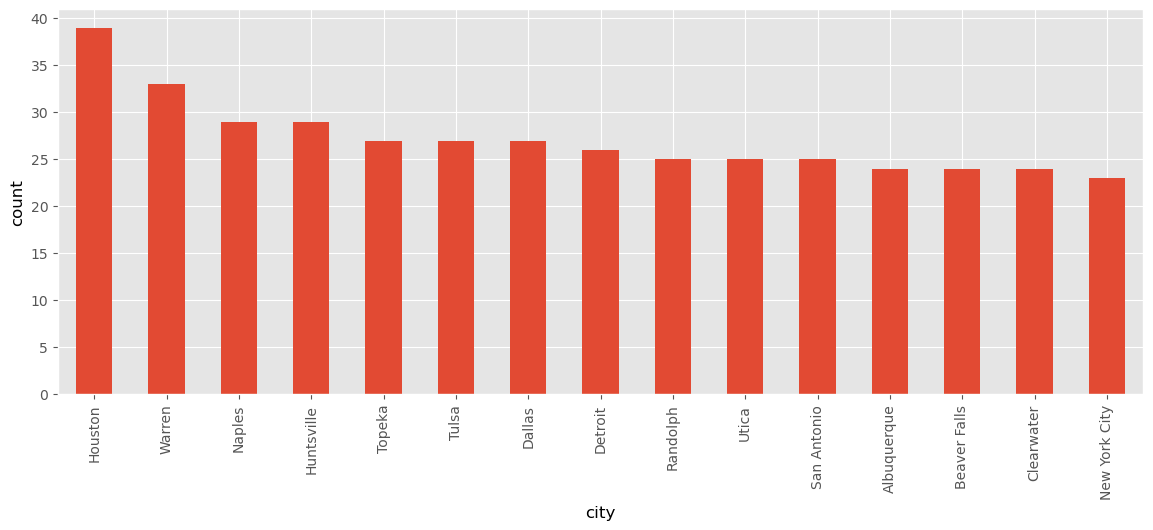

In [33]:
#Performing Univariate Analysis
# Plotting the bar chart for the top 15 cities with high number of frauds 

fraud_train_cases.groupby('city')['is_fraud'].sum().sort_values(ascending=False).head(15).plot(kind='bar', figsize=(14,5))
plt.xlabel("{}".format('city'),fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.ylabel("count",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.xticks(rotation=90)
plt.show()

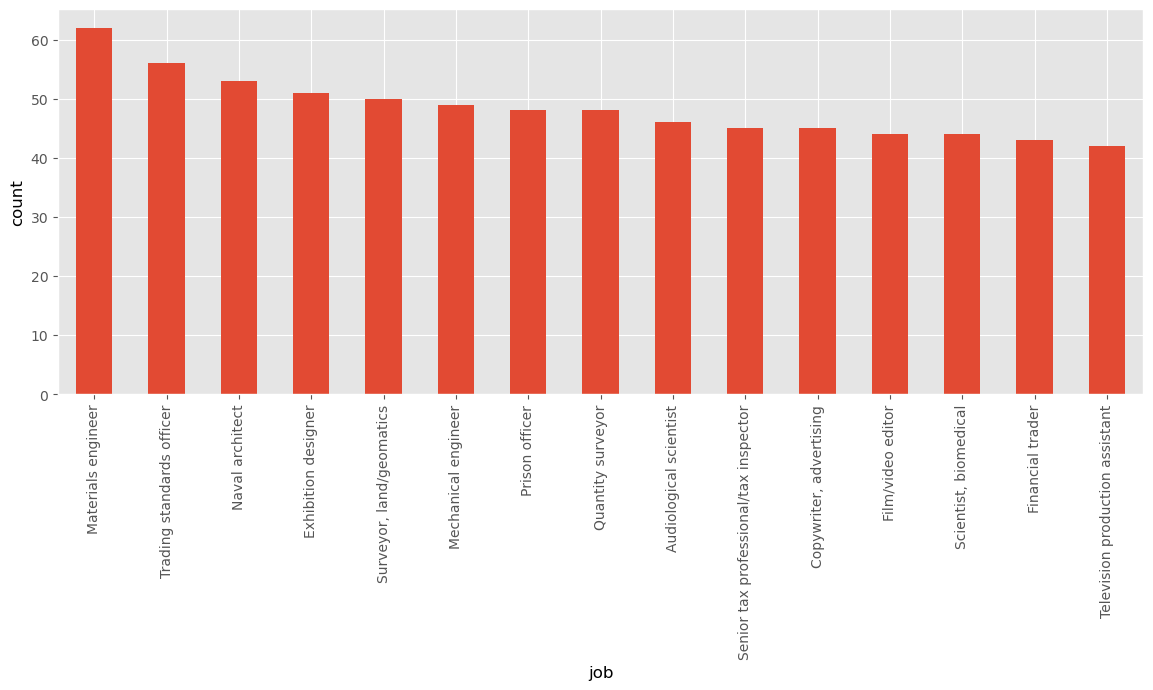

In [34]:
## Plotting the bar plot for the top 15 jobs with high number of frauds

fraud_train_cases.groupby('job')['is_fraud'].sum().sort_values(ascending=False).head(15).plot(kind='bar', figsize=(14,5))
plt.xlabel("{}".format('job'),fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.ylabel("count",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.xticks(rotation=90)
plt.show()

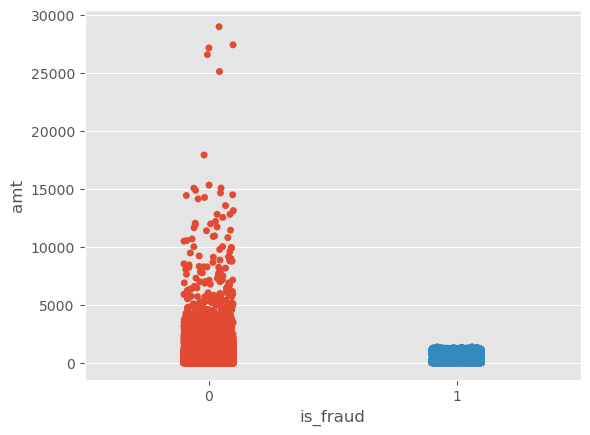

In [35]:
# Plotting the strip plot for amount wrt is_fraud

sns.stripplot(data=dataset_train,x='is_fraud',y='amt')
plt.show()

In [37]:
#Calculating the mean and median value for the amount frauded

fraud_train_cases['amt'].mean()
fraud_train_cases['amt'].median()

396.505

In [38]:
non_fraud_train_cases['amt'].mean()
non_fraud_train_cases['amt'].median()

47.28

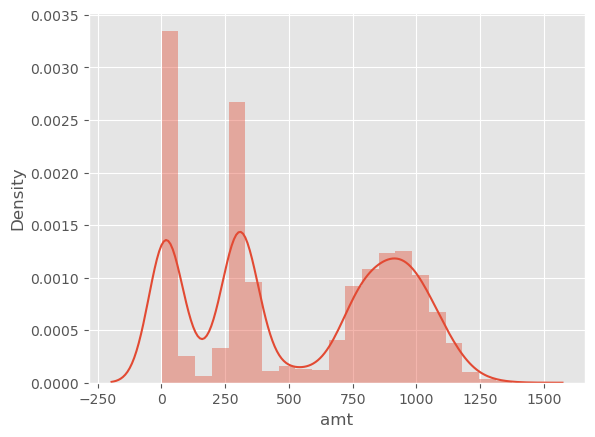

In [39]:
#Plot the ditribution of fraud amount

sns.distplot(fraud_train_cases['amt'])
plt.show()

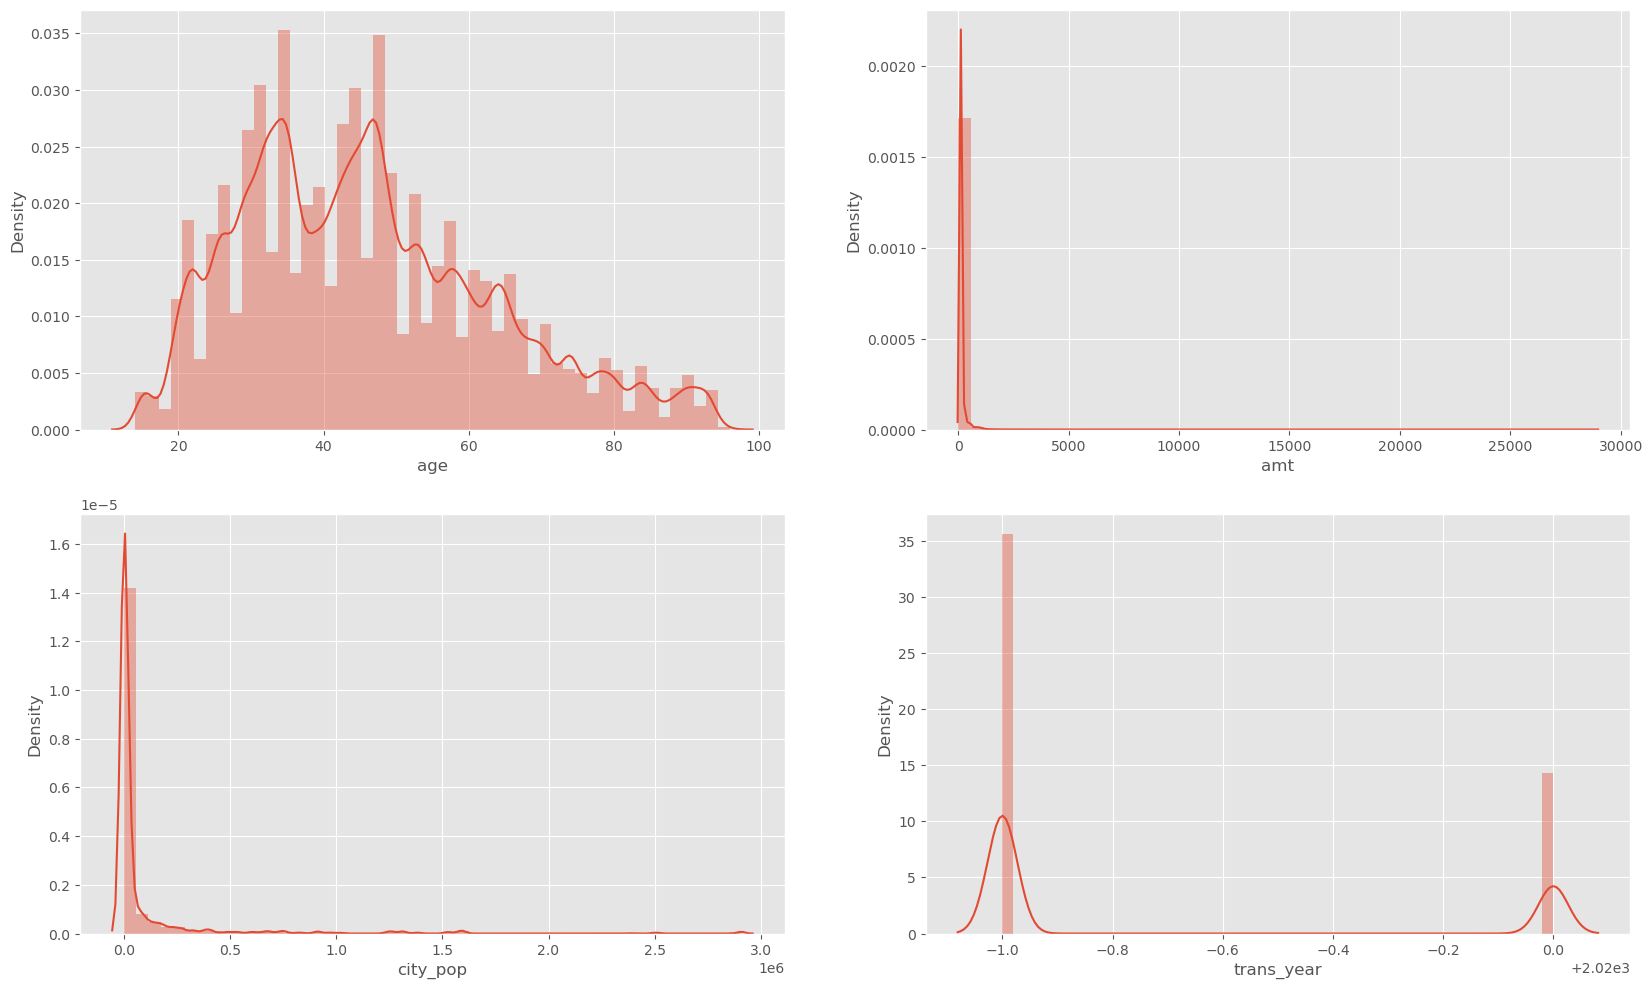

In [40]:
#Plot the dist plot for  the numerical variables

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.distplot(dataset_train['age'])
plt.subplot(2,2,2)
sns.distplot(dataset_train['amt'])
plt.subplot(2,2,3)
sns.distplot(dataset_train['city_pop'])
plt.subplot(2,2,4)
sns.distplot(dataset_train['trans_year'])
plt.show()

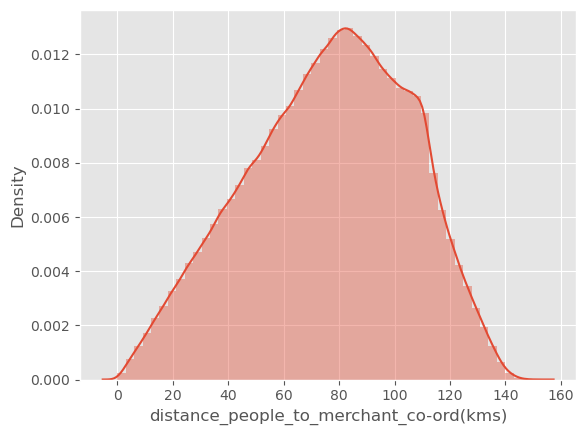

In [41]:
#Plot the distribution of the  distance between people and merchant

sns.distplot(dataset_train['distance_people_to_merchant_co-ord(kms)'])
plt.show()

In [42]:
#Check the % of train Data set that has is_fraud Values = 1:

fraud = (sum(dataset_train['is_fraud'])/len(dataset_train['is_fraud'].index))*100
fraud

0.5788651743883394

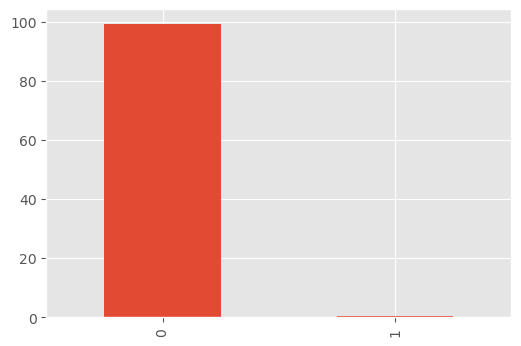

In [43]:
round(100*dataset_train['is_fraud'].value_counts(normalize=True),2).plot(kind='bar', figsize=(6,4))
plt.show()

In [44]:
#Check the % of test Data set that has is_fraud Values = 1:
fraud = (sum(dataset_test['is_fraud'])/len(dataset_test['is_fraud'].index))*100
fraud

0.3859864427885316

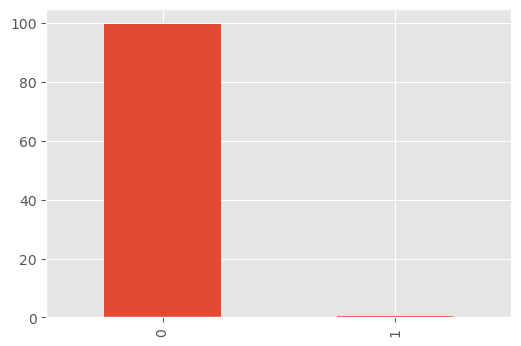

In [45]:
round(100*dataset_test['is_fraud'].value_counts(normalize=True),2).plot(kind='bar', figsize=(6,4))
plt.show()

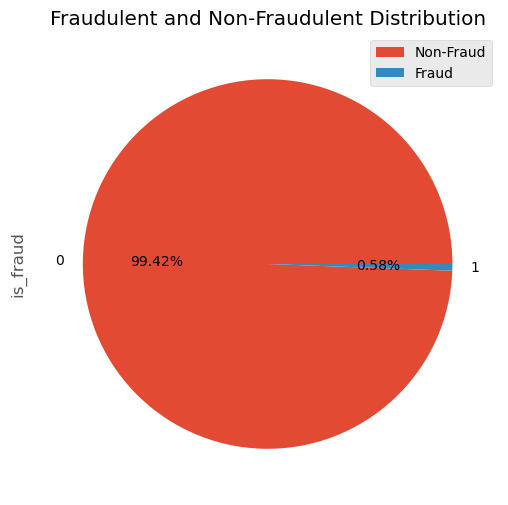

In [46]:
#Fraud and non fraud cases count in pie chart for the training set

round(100*dataset_train['is_fraud'].value_counts(normalize=True),2).plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.title("Fraudulent and Non-Fraudulent Distribution")
plt.legend(["Non-Fraud", "Fraud"])
plt.show()

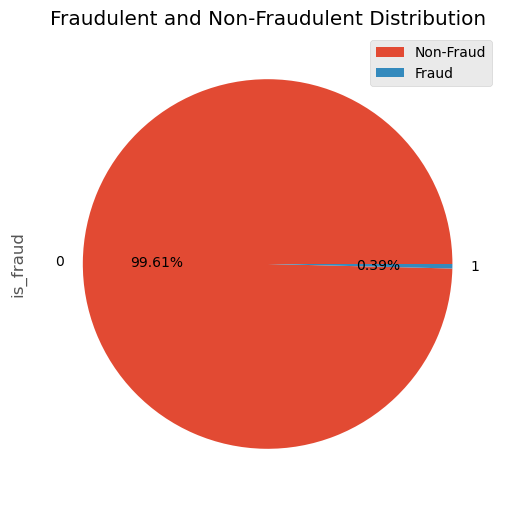

In [47]:
#Fraud and non fraud cases count in pie chart for the testing set

round(100*dataset_test['is_fraud'].value_counts(normalize=True),2).plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.title("Fraudulent and Non-Fraudulent Distribution")
plt.legend(["Non-Fraud", "Fraud"])
plt.show()

In [52]:
fraud_train_cases['job'].value_counts(normalize=True).sort_values(ascending=False).head(100)

Materials engineer           0.008260
Trading standards officer    0.007461
Naval architect              0.007061
Exhibition designer          0.006795
Surveyor, land/geomatics     0.006661
                               ...   
Human resources officer      0.003064
Arboriculturist              0.003064
Engineer, electronics        0.003064
Building control surveyor    0.003064
Social researcher            0.003064
Name: job, Length: 100, dtype: float64

In [53]:
label_encoder=LabelEncoder()
dataset_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'Name', 'Transaction_Date', 'age', 'age_range', 'trans_year',
       'trans_month', 'trans_time', 'Month_name',
       'distance_people_to_merchant_co-ord(kms)'],
      dtype='object')

In [54]:
# Transforming alphabetic job data into numeric to be processed by the model

dataset_train.job = label_encoder.fit_transform(dataset_train.job)
dataset_test.job = label_encoder.fit_transform(dataset_test.job)

In [65]:
fraud_train_cases['state'].value_counts(normalize=True).sort_values(ascending=False).head(10)

NY    0.073941
TX    0.063816
PA    0.061018
CA    0.043432
OH    0.042766
FL    0.037437
IL    0.033040
MI    0.031708
AL    0.028644
MN    0.027578
Name: state, dtype: float64

In [66]:
# Transforming alphabetic state data into numeric to be processed by the model

dataset_train.state = label_encoder.fit_transform(dataset_train.state)
dataset_test.state = label_encoder.fit_transform(dataset_test.state)

In [69]:
# Transforming alphabetic city data into numeric to be processed by the model

dataset_train.city = label_encoder.fit_transform(dataset_train.city)
dataset_test.city = label_encoder.fit_transform(dataset_test.city)

In [70]:
#Checking correlations of numeric values

Correlation=dataset_train.corr()
Correlation

,cc_num,amt,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,trans_year,trans_month,trans_time,distance_people_to_merchant_co-ord(kms)
cc_num,1.000000,0.001769,0.046509,0.049188,-0.036373,0.041459,-0.059271,-0.048278,-0.008991,0.029165,-0.058942,-0.048252,-0.000981,-0.000279,0.000466,-0.000281,-0.000801,0.003730
amt,0.001769,1.000000,0.001346,-0.000565,0.001718,0.001843,-0.001926,-0.000187,0.005818,-0.000628,-0.001873,-0.000151,0.219404,-0.009724,0.000842,-0.001748,-0.022811,-0.001085
street,0.046509,0.001346,1.000000,-0.024811,0.014045,-0.053860,-0.012651,0.071328,-0.012530,-0.020229,-0.012517,0.071286,0.001448,0.037623,-0.001182,0.000384,-0.009915,0.000676
city,0.049188,-0.000565,-0.024811,1.000000,-0.043064,0.074757,-0.032044,-0.066703,0.034923,0.020446,-0.031828,-0.066718,-0.002092,-0.018071,-0.000216,-0.000338,0.006939,0.003149
state,-0.036373,0.001718,0.014045,-0.043064,1.000000,-0.116264,0.213270,0.132465,-0.012197,0.042915,0.211844,0.132346,0.001730,-0.051506,0.000811,0.000276,0.006881,-0.015866
zip,0.041459,0.001843,-0.053860,0.074757,-0.116264,1.000000,-0.114290,-0.909732,0.078467,-0.005678,-0.113561,-0.908924,-0.002162,0.011004,0.000086,0.000852,0.005938,0.006183
lat,-0.059271,-0.001926,-0.012651,-0.032044,0.213270,-0.114290,1.000000,-0.015533,-0.155730,-0.027593,0.993592,-0.015509,0.001894,0.047868,0.001274,-0.001072,-0.011508,-0.072634
long,-0.048278,-0.000187,0.071328,-0.066703,0.132465,-0.909732,-0.015533,1.000000,-0.052715,-0.002729,-0.015452,0.999120,0.001721,-0.030220,0.000191,-0.001213,-0.002290,0.004058
city_pop,-0.008991,0.005818,-0.012530,0.034923,-0.012197,0.078467,-0.155730,-0.052715,1.000000,-0.054945,-0.154781,-0.052687,0.002136,-0.091295,-0.001673,0.000137,0.020381,0.010901
job,0.029165,-0.000628,-0.020229,0.020446,0.042915,-0.005678,-0.027593,-0.002729,-0.054945,1.000000,-0.027412,-0.002727,-0.000093,-0.026334,-0.000545,0.000960,0.011845,0.002150


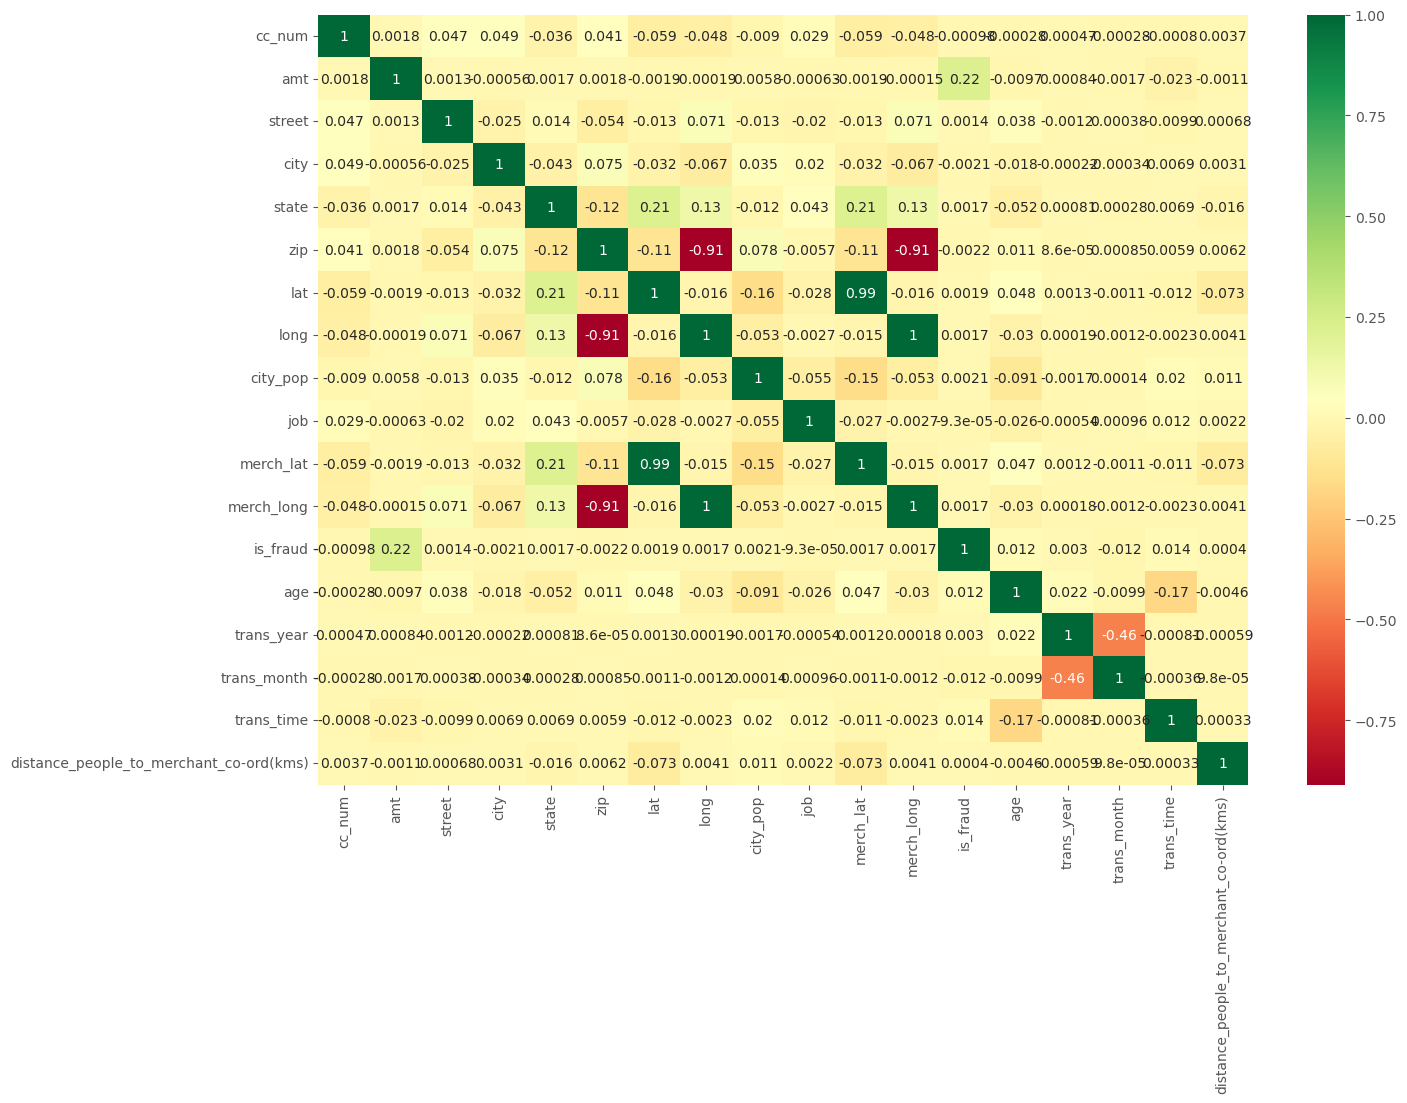

In [71]:
#Plot the heatmap

plt.figure(figsize=[15,10])
sns.heatmap(Correlation,cmap="RdYlGn",annot=True)
plt.show()

In [72]:
#Function for plotting box plot on  variable

def box_plot(variable):
  plt.figure(figsize=(6,4))
  sns.boxplot(y=dataset_train[variable ])
  plt.title("Boxplot for {}".format(variable))
  plt.show()

In [73]:
dataset_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'Name', 'Transaction_Date', 'age', 'age_range', 'trans_year',
       'trans_month', 'trans_time', 'Month_name',
       'distance_people_to_merchant_co-ord(kms)'],
      dtype='object')

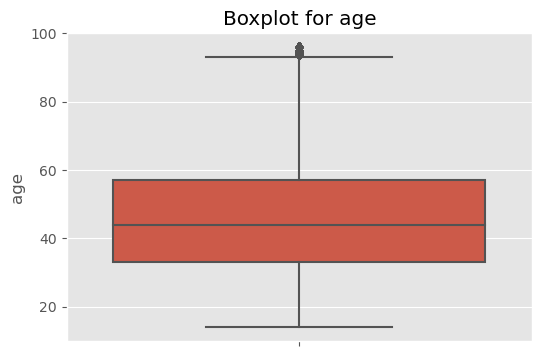

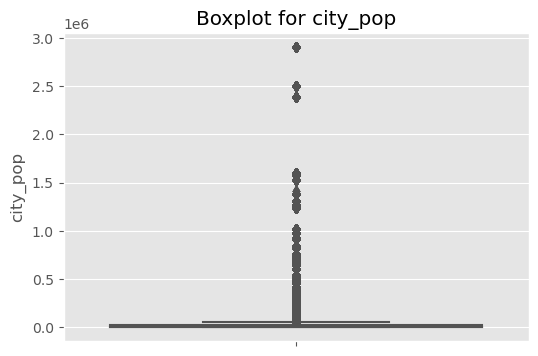

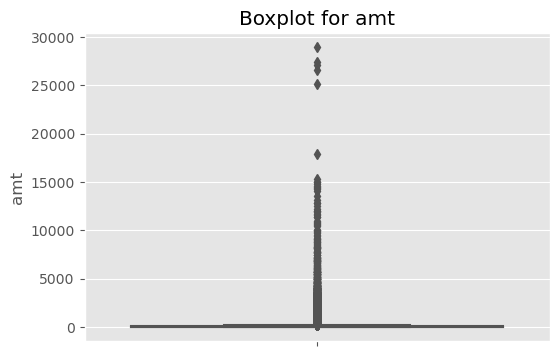

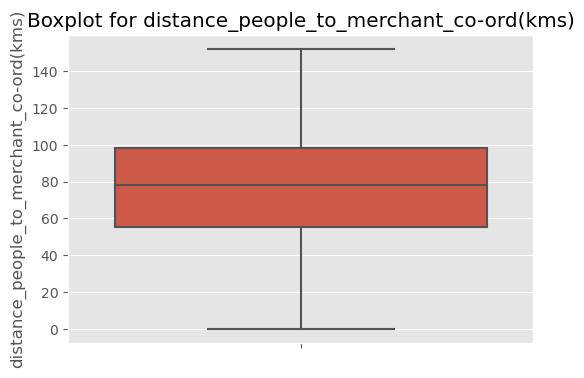

In [74]:
#Boxplot for the columns 'age','city_pop','amt','distance_people_to_merchant_co-ord(kms)'

columns=['age','city_pop','amt','distance_people_to_merchant_co-ord(kms)']
for col in columns:
  box_plot(col)

In [75]:
#Performing the Bivariate analysis
#Function for plotting box plot on  variable

def box_plot_target(variable):
  plt.figure(figsize=(6,4))
  sns.boxplot(y=dataset_train[variable],x=dataset_train['is_fraud'])
  plt.title("Boxplot for {} wrt is_fraud variable".format(variable))
  plt.show()

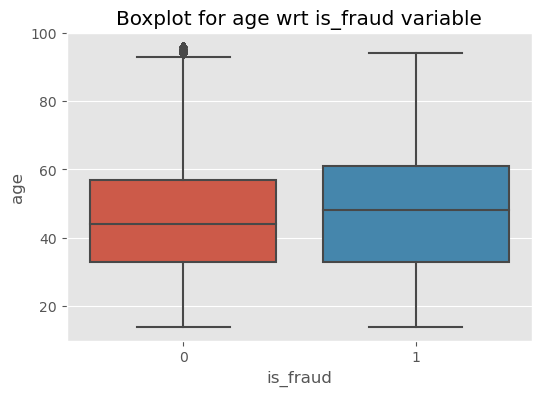

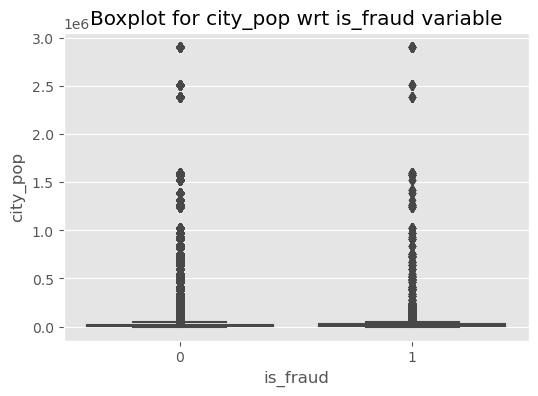

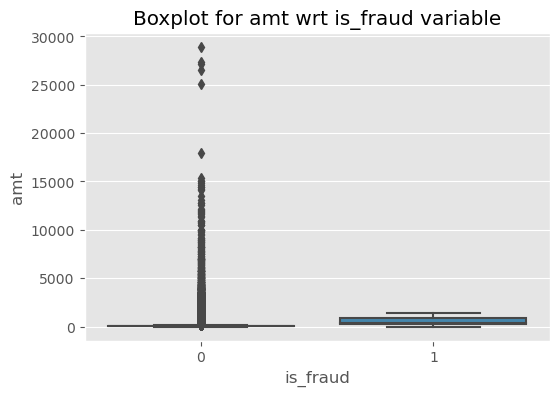

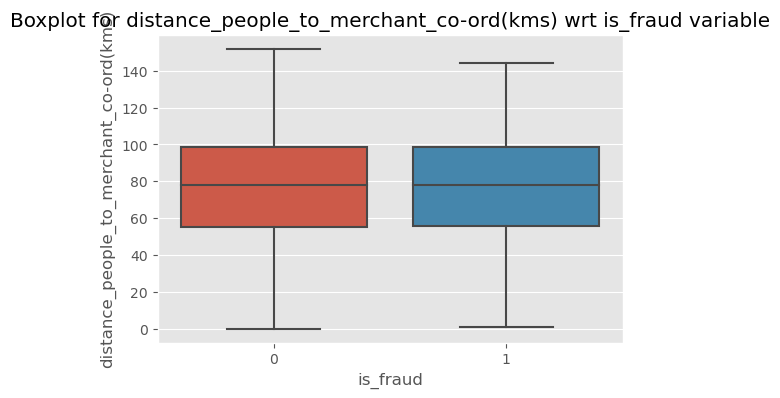

In [76]:
#Boxplot for the fraud and non fraud cases for 'age','city_pop','amt','distance_people_to_merchant_co-ord(kms)'

columns=['age','city_pop','amt','distance_people_to_merchant_co-ord(kms)']
for col in columns:
  box_plot_target(col)

In [77]:
fraud_train_cases.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'Name', 'Transaction_Date', 'age', 'age_range', 'trans_year',
       'trans_month', 'trans_time', 'Month_name',
       'distance_people_to_merchant_co-ord(kms)'],
      dtype='object')

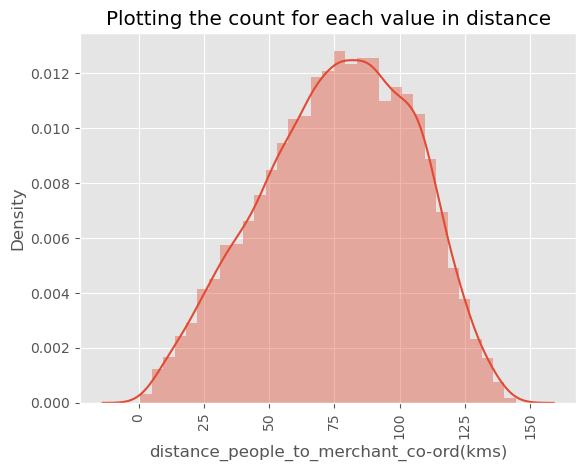

In [78]:
#Distribution of the distance between client latitude,longitude and merchant lat and longitude

sns.distplot(fraud_train_cases['distance_people_to_merchant_co-ord(kms)'])
plt.title("Plotting the count for each value in distance")
plt.xticks(rotation=90)
plt.show()

In [79]:
#Function for the bivariate chart
    
def bivariatechart(col_name):
    fig, ax =plt.subplots(figsize=(10,8))
    graph=sns.countplot(x=col_name, data=dataset_train,hue=dataset_train['is_fraud'])
    plt.title("Plotting the count for each value in the {} column".format(col_name))
    plt.xticks(rotation=90)
    plt.show()

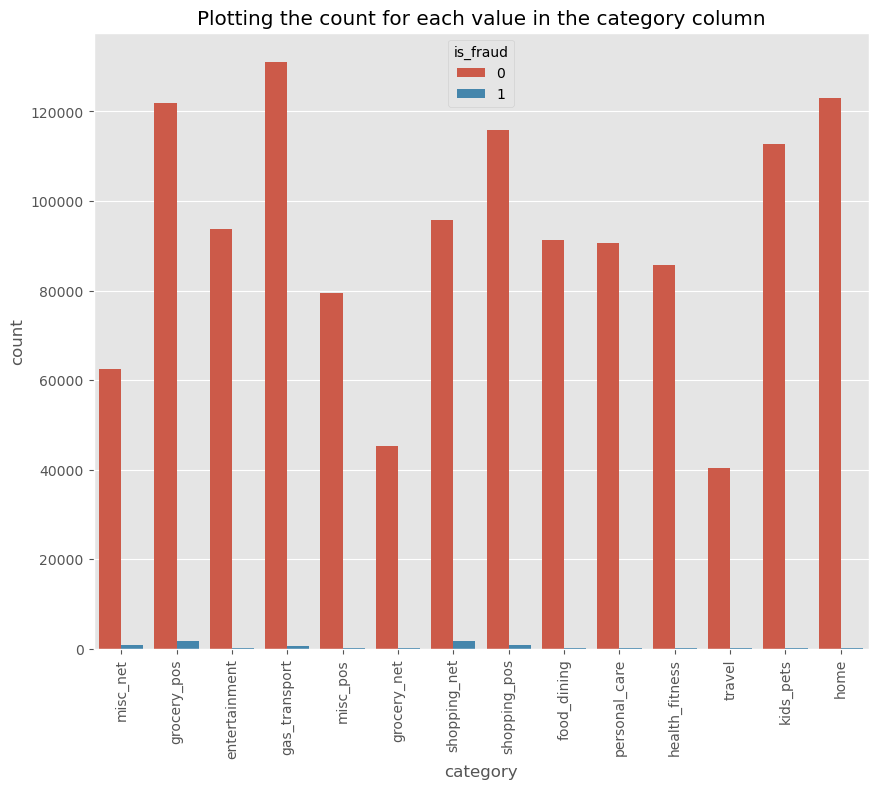

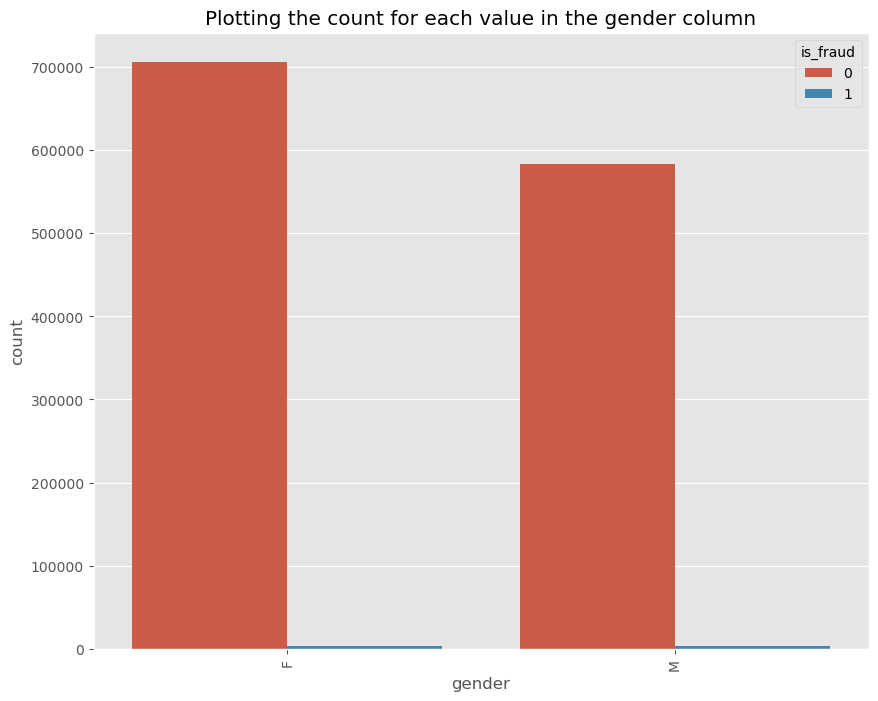

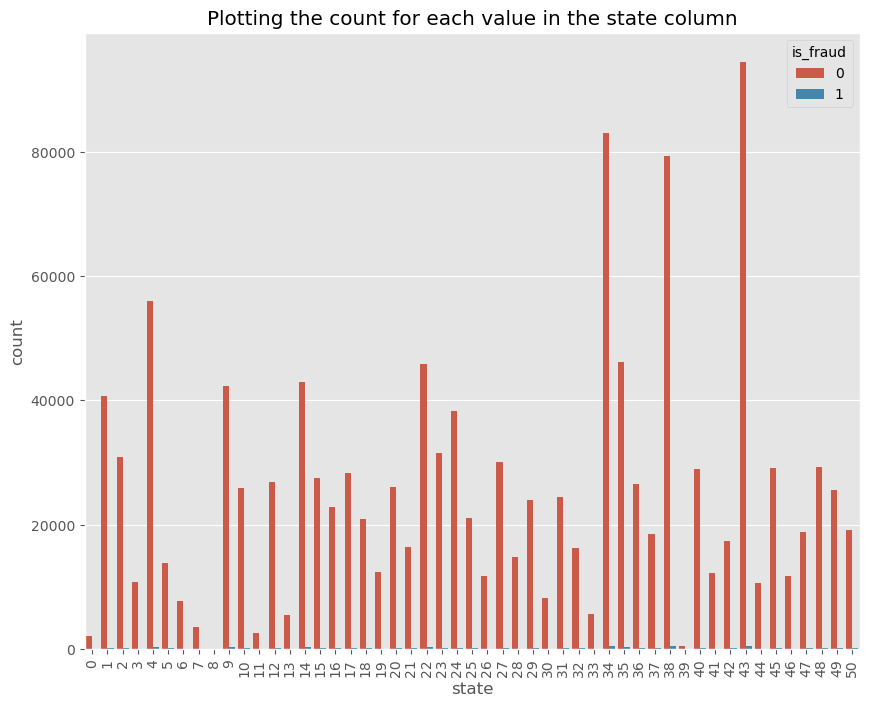

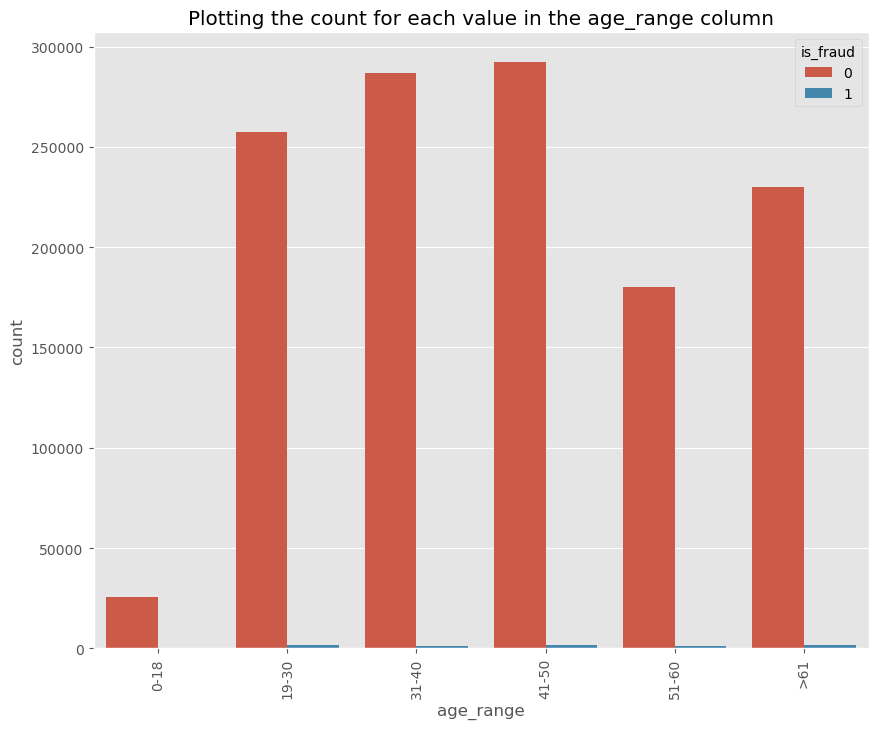

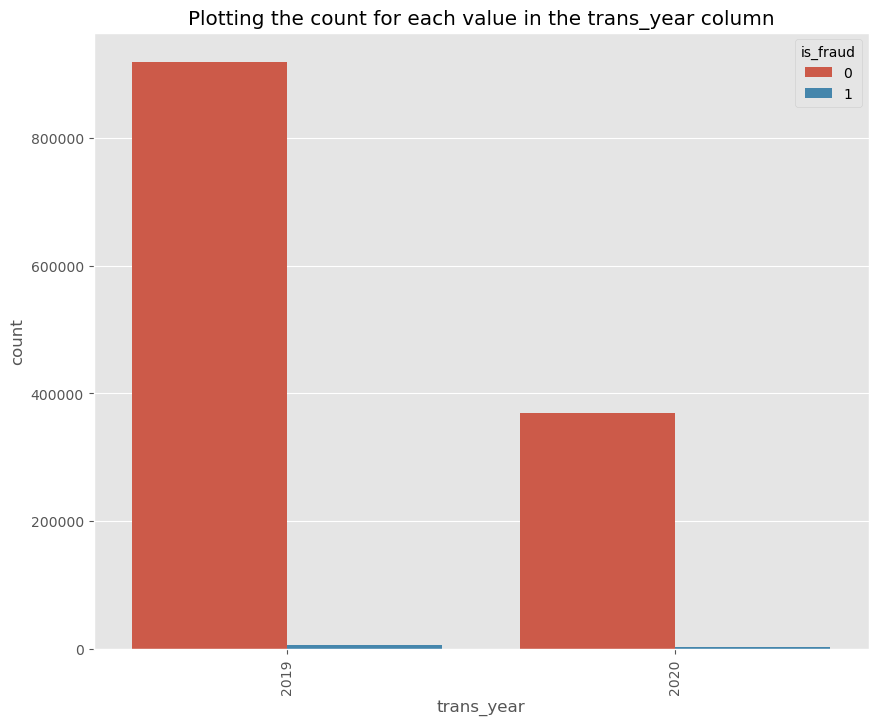

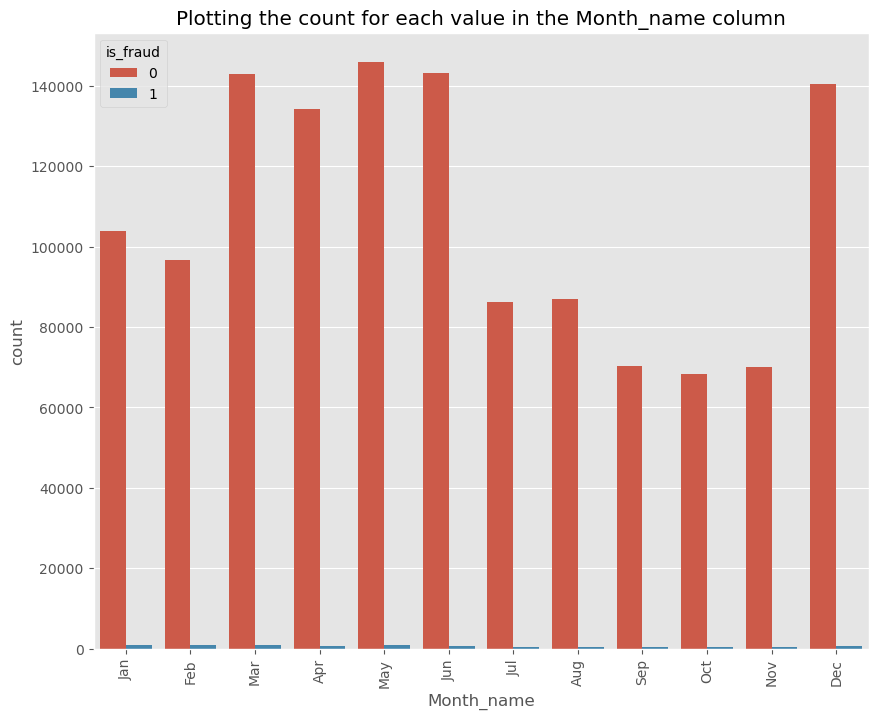

In [80]:
#bivariate analysis of the columns 'category','gender','state','age_range','trans_year','Month_name' wrt is_fraud

col_name=['category','gender','state','age_range','trans_year','Month_name']
for i in col_name:
    bivariatechart(i)

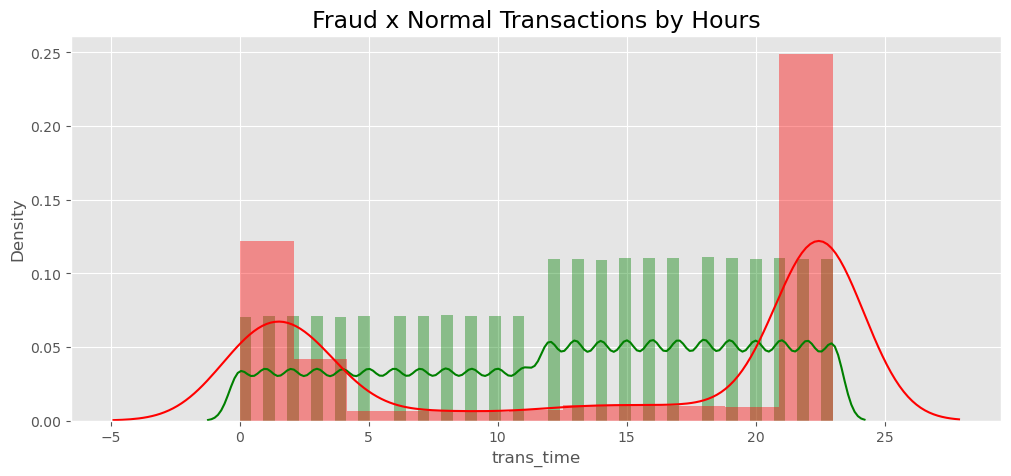

In [92]:
plt.figure(figsize=(12,5))
sns.distplot(dataset_train[dataset_train['is_fraud'] == 0]["trans_time"], color='g')
sns.distplot(dataset_train[dataset_train['is_fraud'] == 1]["trans_time"], color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.show()

In [94]:
# Count of values for 'category'
category_counts = dataset_train['category'].value_counts(dropna=False)
print("Count of values for 'category':")
print(category_counts)

# Count of values for 'gender'
gender_counts = dataset_train['gender'].value_counts(dropna=False)
print("\nCount of values for 'gender':")
print(gender_counts)

# Count of values for 'state'
state_counts = dataset_train['state'].value_counts(dropna=False)
print("\nCount of values for 'state':")
print(state_counts)

# Count of values for 'age_range'
age_range_counts = dataset_train['age_range'].value_counts(dropna=False)
print("\nCount of values for 'age_range':")
print(age_range_counts)

# Count of values for 'trans_year'
trans_year_counts = dataset_train['trans_year'].value_counts(dropna=False)
print("\nCount of values for 'trans_year':")
print(trans_year_counts)

# Count of values for 'Month_name'
month_name_counts = dataset_train['Month_name'].value_counts(dropna=False)
print("\nCount of values for 'Month_name':")
print(month_name_counts)

Count of values for 'category':
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

Count of values for 'gender':
F    709863
M    586812
Name: gender, dtype: int64

Count of values for 'state':
43    94876
34    83501
38    79847
4     56360
35    46480
22    46154
14    43252
9     42671
1     40989
24    38403
23    31714
2     31127
27    30266
48    29368
45    29250
40    29190
17    28475
15    27580
12    26985
36    26671
20    26193
10    26063
49    25691
31    24603
29    24168
16    22996
25    21188
18    20965
50    19322
47    18924
37    18597
42    17554
21    16505
32    16407
28    14786
5     13880
19    12376
41    12324
46    11768
26    117

In [95]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(dataset_train[['category', 'gender']], drop_first=True)
dummy2 = pd.get_dummies(dataset_test[['category', 'gender']], drop_first=True)

# Adding the results to the master dataframe
dataset_train = pd.concat([dataset_train, dummy1], axis=1)
dataset_test = pd.concat([dataset_test, dummy2], axis=1)

In [96]:
dataset_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'Name', 'Transaction_Date', 'age', 'age_range', 'trans_year',
       'trans_month', 'trans_time', 'Month_name',
       'distance_people_to_merchant_co-ord(kms)', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M'],
      dtype='object')

In [97]:
 #Drop all the unwanted columns
    
 dataset_train.drop(['age_range','unix_time','Month_name','cc_num','trans_num','Transaction_Date','trans_date_trans_time','merchant','category','gender','street','zip','lat', 'long', 'merch_lat', 'merch_long','Name' ],axis=1,inplace=True)
 dataset_test.drop(['age_range','unix_time','Month_name','cc_num','trans_num','Transaction_Date','trans_date_trans_time','merchant','category','gender','street','zip','lat', 'long', 'merch_lat', 'merch_long','Name' ],axis=1,inplace=True)

In [98]:
#Splitting the dataset

X=dataset_train.drop('is_fraud',axis=1)
y=dataset_train['is_fraud']

In [99]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)
# Inspecting the train and validation datasets
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((907672, 24), (907672,), (389003, 24), (389003,))

In [100]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907672 entries, 192318 to 33493
Data columns (total 24 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   amt                                      907672 non-null  float64
 1   city                                     907672 non-null  int64  
 2   state                                    907672 non-null  int64  
 3   city_pop                                 907672 non-null  int64  
 4   job                                      907672 non-null  int32  
 5   age                                      907672 non-null  int64  
 6   trans_year                               907672 non-null  int64  
 7   trans_month                              907672 non-null  int64  
 8   trans_time                               907672 non-null  int64  
 9   distance_people_to_merchant_co-ord(kms)  907672 non-null  float64
 10  category_food_dining        

In [102]:
#Normalisation using power transformer

scaler = PowerTransformer()
X_train[['amt','city_pop','distance_people_to_merchant_co-ord(kms)','trans_year','trans_time','city', 'state','job','trans_month','age']] = scaler.fit_transform(X_train[['amt','city_pop','distance_people_to_merchant_co-ord(kms)','trans_year','trans_time','city', 'state','job','trans_month','age']])
X_valid[['amt','city_pop','distance_people_to_merchant_co-ord(kms)','trans_year','trans_time','city', 'state','job','trans_month','age']] = scaler.transform(X_valid[['amt','city_pop','distance_people_to_merchant_co-ord(kms)','trans_year','trans_time','city', 'state','job','trans_month','age']])
dataset_test[['amt','city_pop','distance_people_to_merchant_co-ord(kms)','trans_year','trans_time','city', 'state','job','trans_month','age']] = scaler.transform(dataset_test[['amt','city_pop','distance_people_to_merchant_co-ord(kms)','trans_year','trans_time','city', 'state','job','trans_month','age']])
X_train.head()

,amt,city,state,city_pop,job,age,trans_year,trans_month,trans_time,distance_people_to_merchant_co-ord(kms),...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
192318,1.480505,-1.555876,-1.636223,0.138768,1.113232,0.026256,-0.634435,-0.545696,1.644029,-0.816982,...,0,0,0,0,0,0,1,0,0,0
318906,-0.712925,0.836255,1.174754,-1.265078,-1.491412,1.004795,-0.634435,0.069072,-0.216370,-0.843678,...,0,0,1,0,0,0,0,0,0,0
212432,0.197463,0.714663,-0.580847,0.211446,-1.904852,2.159556,-0.634435,-0.545696,0.566555,-1.977896,...,0,0,0,0,0,1,0,0,0,0
979043,1.245701,-0.638042,-1.198923,1.472421,0.536441,-0.556007,1.576206,-1.288392,1.644029,-0.131714,...,0,1,0,0,0,0,0,0,0,0
614236,0.921029,0.029483,-0.892924,-1.139947,1.163189,-0.033675,-0.634435,0.864922,1.644029,-0.928270,...,1,0,0,0,0,0,0,0,0,0


In [103]:
X_train.describe()

,amt,city,state,city_pop,job,age,trans_year,trans_month,trans_time,distance_people_to_merchant_co-ord(kms),...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
count,9.076720e+05,9.076720e+05,9.076720e+05,9.076720e+05,9.076720e+05,9.076720e+05,9.076720e+05,9.076720e+05,9.076720e+05,9.076720e+05,...,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000
mean,-7.433721e-17,-4.920486e-16,5.621713e-16,-4.212030e-17,-2.045570e-16,-1.309545e-15,3.036803e-15,2.778041e-16,4.616160e-16,-2.043169e-17,...,0.066187,0.094954,0.087079,0.048569,0.061455,0.070036,0.075271,0.089833,0.031300,0.453537
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,0.248609,0.293151,0.281951,0.214966,0.240163,0.255208,0.263828,0.285943,0.174127,0.497837
min,-1.938645e+00,-1.937802e+00,-1.773445e+00,-2.972088e+00,-1.974221e+00,-2.593453e+00,-6.344348e-01,-1.753301e+00,-1.721195e+00,-2.294651e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.288213e-01,-8.177265e-01,-8.312229e-01,-6.747431e-01,-8.282882e-01,-7.007120e-01,-6.344348e-01,-8.947888e-01,-8.807652e-01,-7.490536e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.900351e-01,-1.178183e-02,2.047192e-02,-8.356828e-02,1.224777e-03,2.625635e-02,-6.344348e-01,6.907244e-02,8.122208e-02,1.196773e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.599756e-01,8.894503e-01,7.730653e-01,7.538760e-01,8.707508e-01,7.238231e-01,1.576206e+00,8.649218e-01,9.115692e-01,7.553544e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,8.103707e+00,1.708229e+00,1.758980e+00,2.044928e+00,1.720006e+00,2.258097e+00,1.576206e+00,1.559962e+00,1.644029e+00,2.946675e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


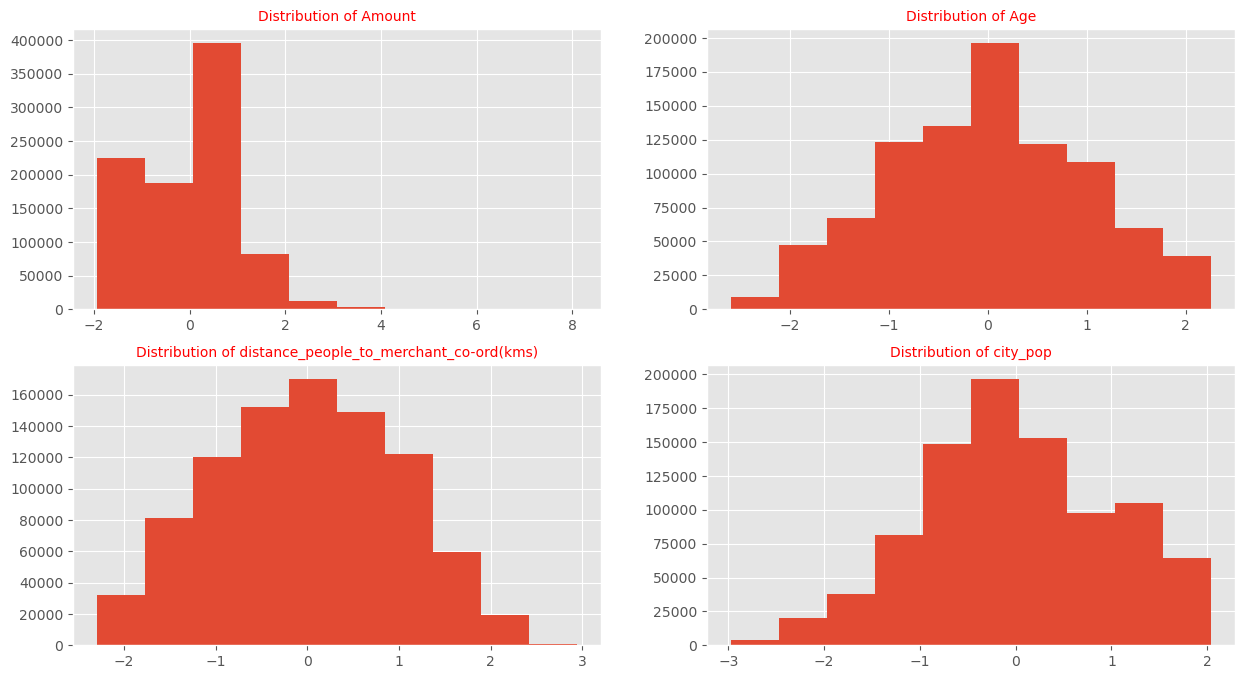

In [104]:
# Lets check the distribution after scaling

plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('Distribution of Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.amt)
plt.subplot(2,2,2)
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.age)
plt.subplot(2,2,3)
plt.title('Distribution of distance_people_to_merchant_co-ord(kms)', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train['distance_people_to_merchant_co-ord(kms)'])
plt.subplot(2,2,4)
plt.title('Distribution of city_pop', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.city_pop)
plt.show()

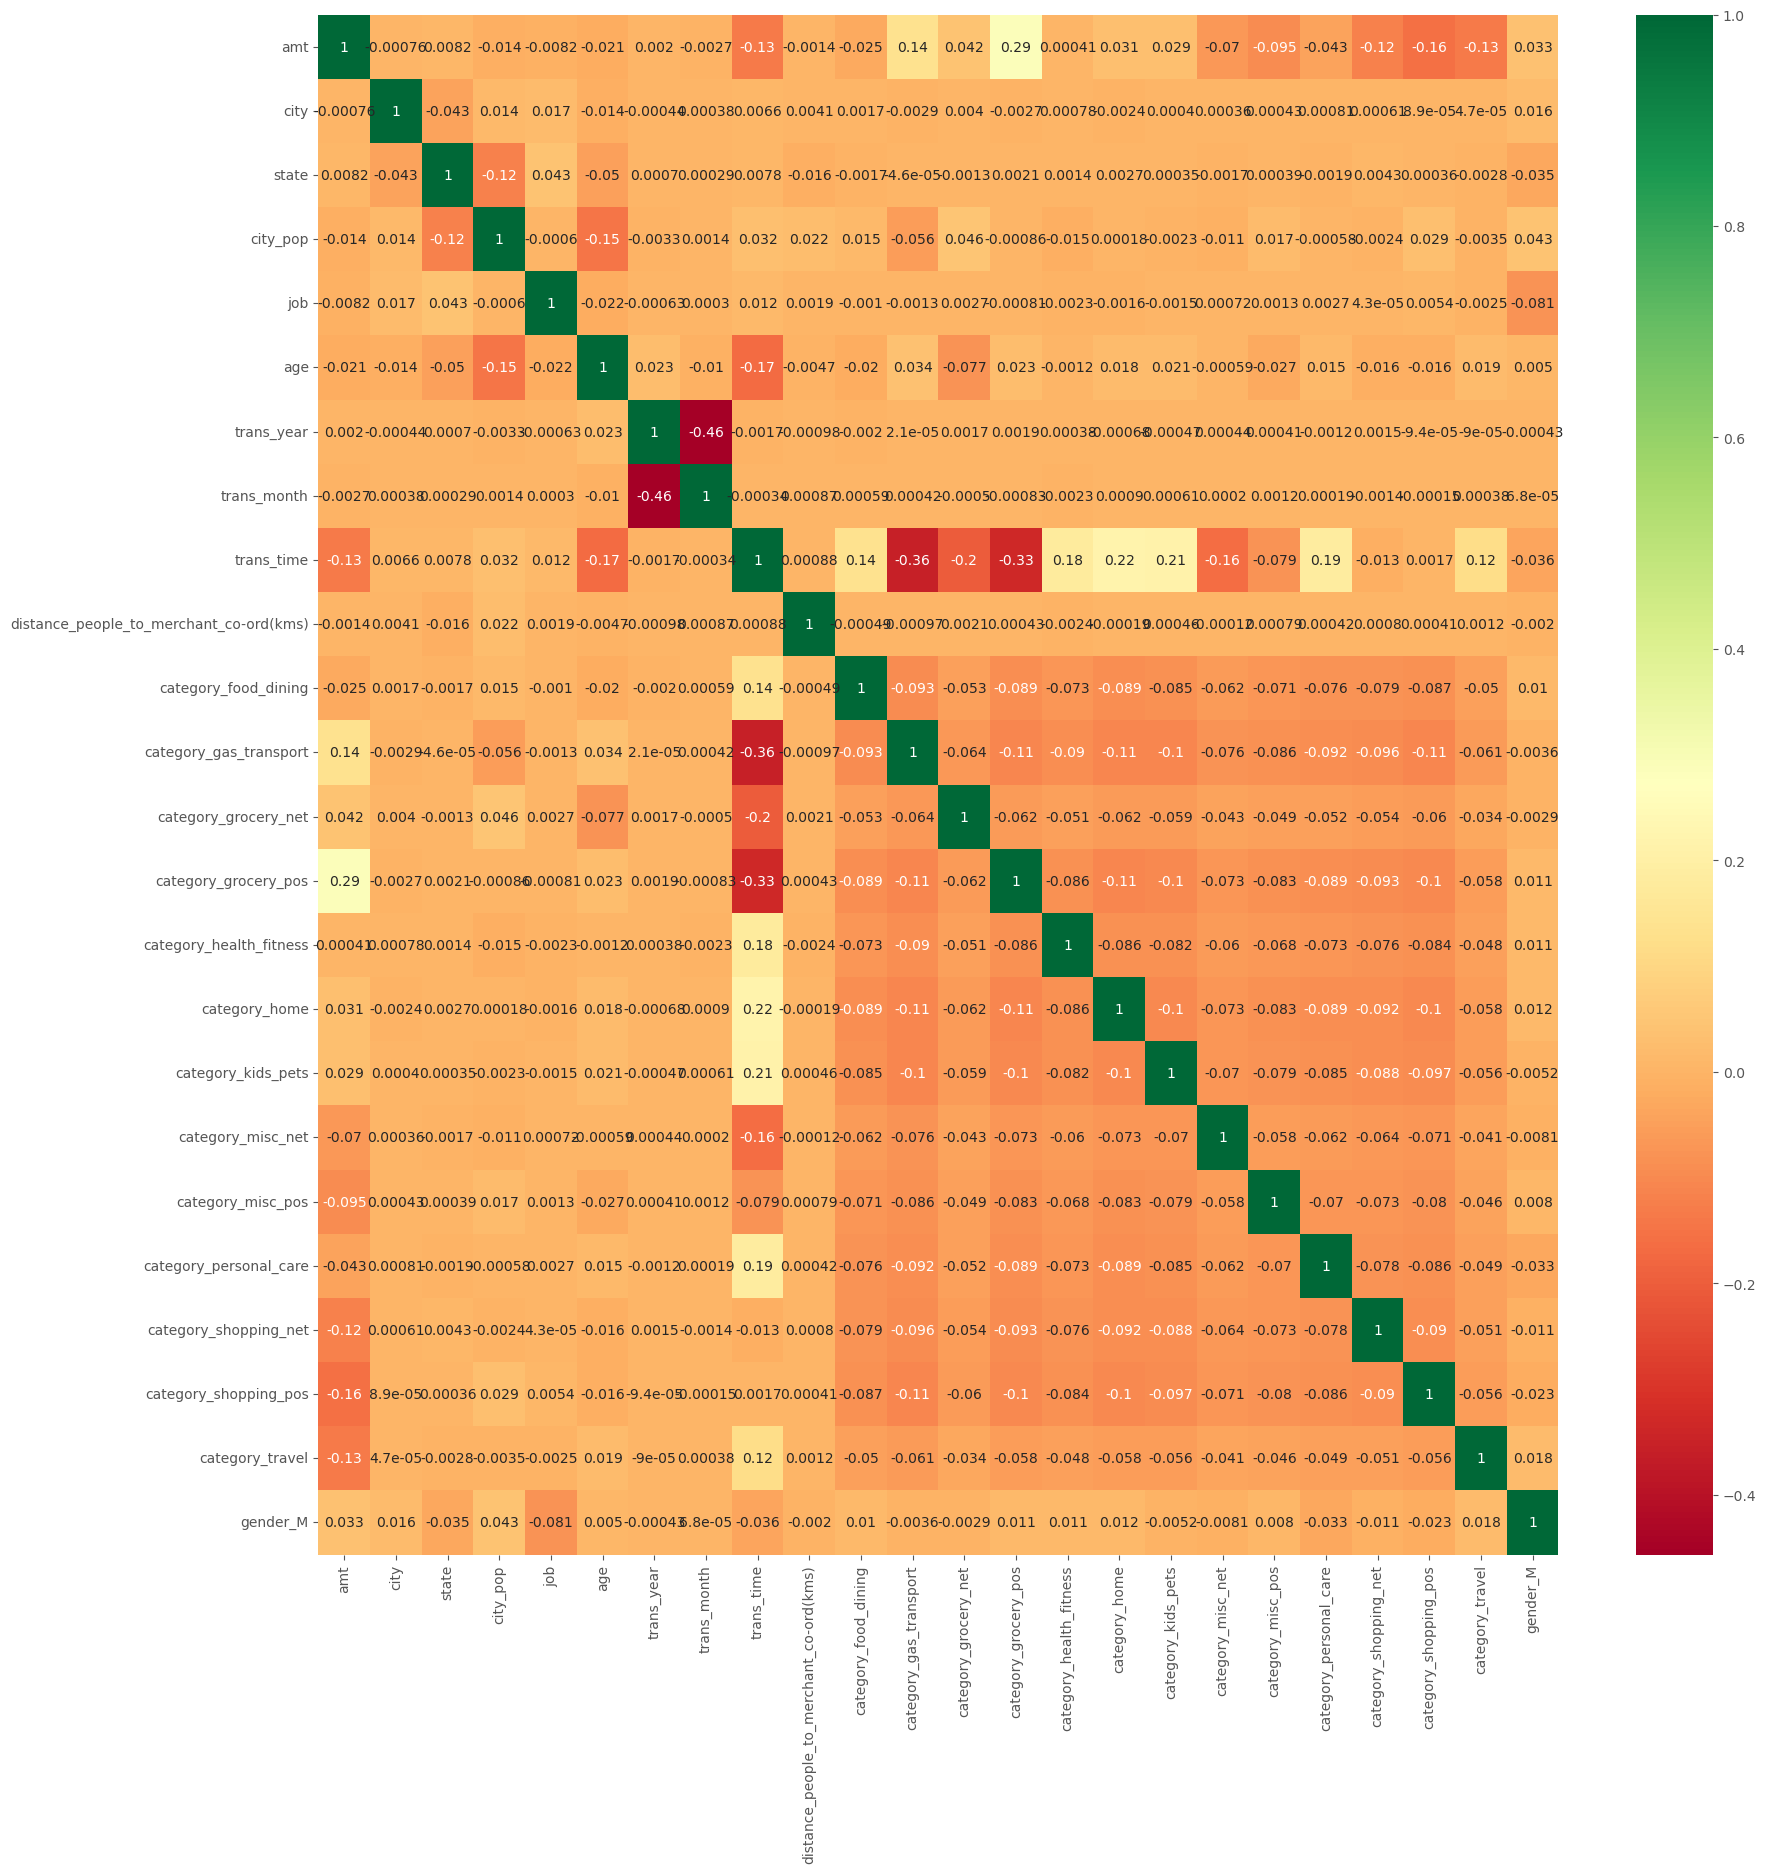

In [105]:
# Let's examine any correlation in variables and remove variables with high correlation

plt.figure(figsize = (20,20))
sns.heatmap(X_train.corr(),cmap='RdYlGn',annot=True)
plt.show()

In [106]:
X_train.columns

Index(['amt', 'city', 'state', 'city_pop', 'job', 'age', 'trans_year',
       'trans_month', 'trans_time', 'distance_people_to_merchant_co-ord(kms)',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M'],
      dtype='object')

In [107]:
# Address imbalance using under sampling
us = under_sampling.RandomUnderSampler(sampling_strategy='majority',random_state=100)
X_train_us, y_train_us = us.fit_resample(X_train, y_train)
print (X_train_us.shape)
print (y_train_us.shape)
print (y_train_us.value_counts())

# Address imbalance using over sampling
ro = over_sampling.RandomOverSampler(sampling_strategy='minority',random_state=100)
X_train_ro, y_train_ro = ro.fit_resample(X_train, y_train)
print (X_train_ro.shape)
print (y_train_ro.shape)
print (y_train_ro.value_counts())

#Address imbalnce using SMOTE
sm = SMOTE(sampling_strategy='minority',random_state=40)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print (X_train_smote.shape)
print (y_train_smote.shape)
print (y_train_smote.value_counts())


#Address imbalnce using ADASYN
ada = ADASYN(sampling_strategy='minority',random_state=40)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
print (X_train_ada.shape)
print (y_train_ada.shape)
print (y_train_ada.value_counts())

(10508, 24)
(10508,)
0    5254
1    5254
Name: is_fraud, dtype: int64
(1804836, 24)
(1804836,)
0    902418
1    902418
Name: is_fraud, dtype: int64
(1804836, 24)
(1804836,)
0    902418
1    902418
Name: is_fraud, dtype: int64
(1805149, 24)
(1805149,)
1    902731
0    902418
Name: is_fraud, dtype: int64


In [115]:
# Function to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


# Function to return various standard metrices for a model
def model_metrics(a, p):
  confusion = confusion_matrix(a, p)
  TP = confusion[1,1] # true positive 
  TN = confusion[0,0] # true negatives
  FP = confusion[0,1] # false positives
  FN = confusion[1,0] # false negatives
  print ('Accuracy    : ', metrics.accuracy_score(a, p ))
  print ('Sensitivity : ', TP / float(TP+FN))
  print ('Specificity : ', TN / float(TN+FP))
  print ('Precision   : ', TP / float(TP + FP))
  print ('Recall      : ', TP / float(TP + FN))
  print('F1_score:',metrics.f1_score(a,p))
  print(confusion)

  
  return None

In [119]:
#RNN Model Building

# Normalisation using power transformer
scaler = PowerTransformer()
X_train_smote[['amt', 'city_pop', 'distance_people_to_merchant_co-ord(kms)', 'trans_year', 'trans_time',
               'city', 'state', 'job', 'trans_month', 'age']] = scaler.fit_transform(X_train_smote[
                                                                                        ['amt', 'city_pop',
                                                                                         'distance_people_to_merchant_co-ord(kms)',
                                                                                         'trans_year', 'trans_time',
                                                                                         'city', 'state', 'job',
                                                                                         'trans_month', 'age']])
X_valid[['amt', 'city_pop', 'distance_people_to_merchant_co-ord(kms)', 'trans_year', 'trans_time',
         'city', 'state', 'job', 'trans_month', 'age']] = scaler.transform(X_valid[
                                                                               ['amt', 'city_pop',
                                                                                'distance_people_to_merchant_co-ord(kms)',
                                                                                'trans_year', 'trans_time',
                                                                                'city', 'state', 'job',
                                                                                'trans_month', 'age']])


In [120]:
# Apply PCA transformations to reduce dimensionality
#Reduces the dimensionality of the dataset from being large to become small

pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_smote)
X_valid_pca = pca.transform(X_valid)

In [122]:
#view the dataset dimension after applying PCA
X_train.shape

(907672, 24)

In [123]:
# Reshape the data for LSTM model
X_train_pca_lstm = np.reshape(X_train_pca, (X_train_pca.shape[0], 1, X_train_pca.shape[1]))
X_valid_pca_lstm = np.reshape(X_valid_pca, (X_valid_pca.shape[0], 1, X_valid_pca.shape[1]))


In [124]:
# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'units': [64, 128, 256],
    'batch_size': [32, 64, 128],
    'epochs': [5, 10, 15],
}

In [126]:
# Building the RNN model

model = Sequential()
model.add(LSTM(128, input_shape=(X_train_pca_lstm.shape[1], X_train_pca_lstm.shape[2]), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [127]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [128]:
# Training the model
history = model.fit(X_train_pca_lstm, y_train_smote, epochs=5, batch_size=64, validation_data=(X_valid_pca_lstm, y_valid))


Epoch 1/5
28201/28201 [==============================] - 118s 4ms/step - loss: 0.0927 - accuracy: 0.9647 - val_loss: 0.0678 - val_accuracy: 0.9726
Epoch 2/5
28201/28201 [==============================] - 105s 4ms/step - loss: 0.0564 - accuracy: 0.9794 - val_loss: 0.0526 - val_accuracy: 0.9799
Epoch 3/5
28201/28201 [==============================] - 112s 4ms/step - loss: 0.0452 - accuracy: 0.9842 - val_loss: 0.0587 - val_accuracy: 0.9786
Epoch 4/5
28201/28201 [==============================] - 105s 4ms/step - loss: 0.0380 - accuracy: 0.9871 - val_loss: 0.0393 - val_accuracy: 0.9867
Epoch 5/5
28201/28201 [==============================] - 105s 4ms/step - loss: 0.0325 - accuracy: 0.9892 - val_loss: 0.0432 - val_accuracy: 0.9852


In [129]:
# Predict on validation data
y_pred_valid = model.predict(X_valid_pca_lstm)
y_pred_classes_valid = (y_pred_valid > 0.5).astype(int)

12157/12157 [==============================] - 19s 2ms/step


In [130]:
#Metrics evaluation
confusion = confusion_matrix(y_valid, y_pred_classes_valid)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Print model metrics

print ('Accuracy    : ', metrics.accuracy_score(y_valid, y_pred_classes_valid))
print ('Sensitivity : ', TP / float(TP+FN))
print ('Specificity : ', TN / float(TN+FP))
print ('Precision   : ', TP / float(TP + FP))
print ('Recall      : ', TP / float(TP + FN))
print('F1_score:',metrics.f1_score(y_valid, y_pred_classes_valid))
print(confusion)

Accuracy    :  0.9851594974845952
Sensitivity :  0.8894316163410302
Specificity :  0.9857169082950011
Precision   :  0.2661086754351003
Recall      :  0.8894316163410302
F1_score: 0.409653338787197
[[381227   5524]
 [   249   2003]]


In [132]:
# Function to draw ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

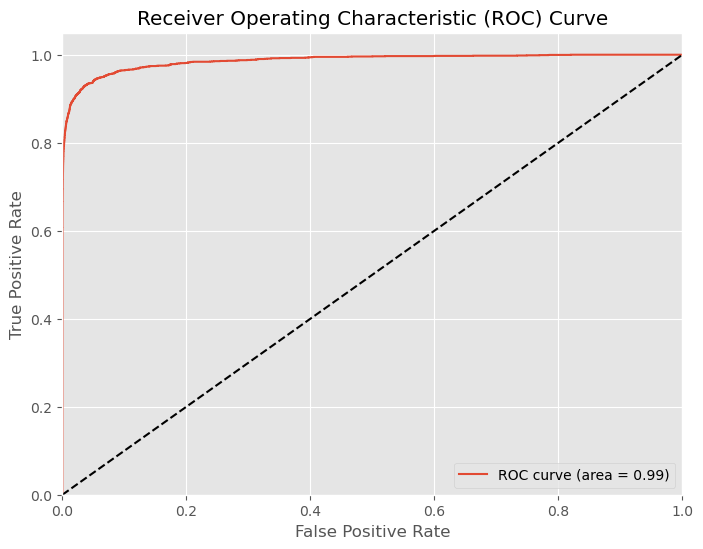

In [133]:
# Draw ROC curve
draw_roc(y_valid, y_pred_valid)

In [134]:
# Function to plot confusion matrix

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

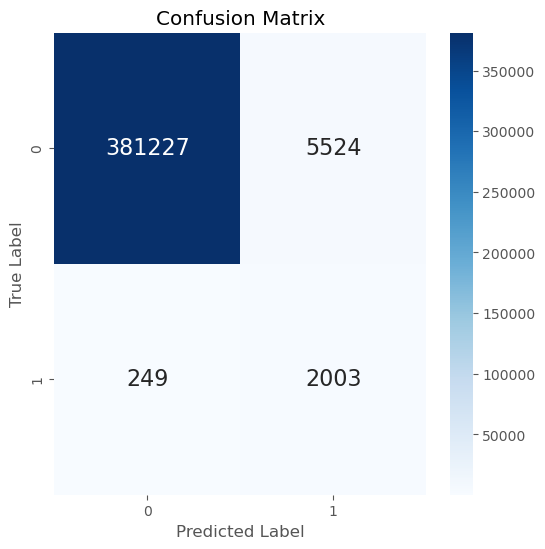

In [135]:
# Plot Confusion Matrix
plot_confusion_matrix(y_valid, y_pred_classes_valid)

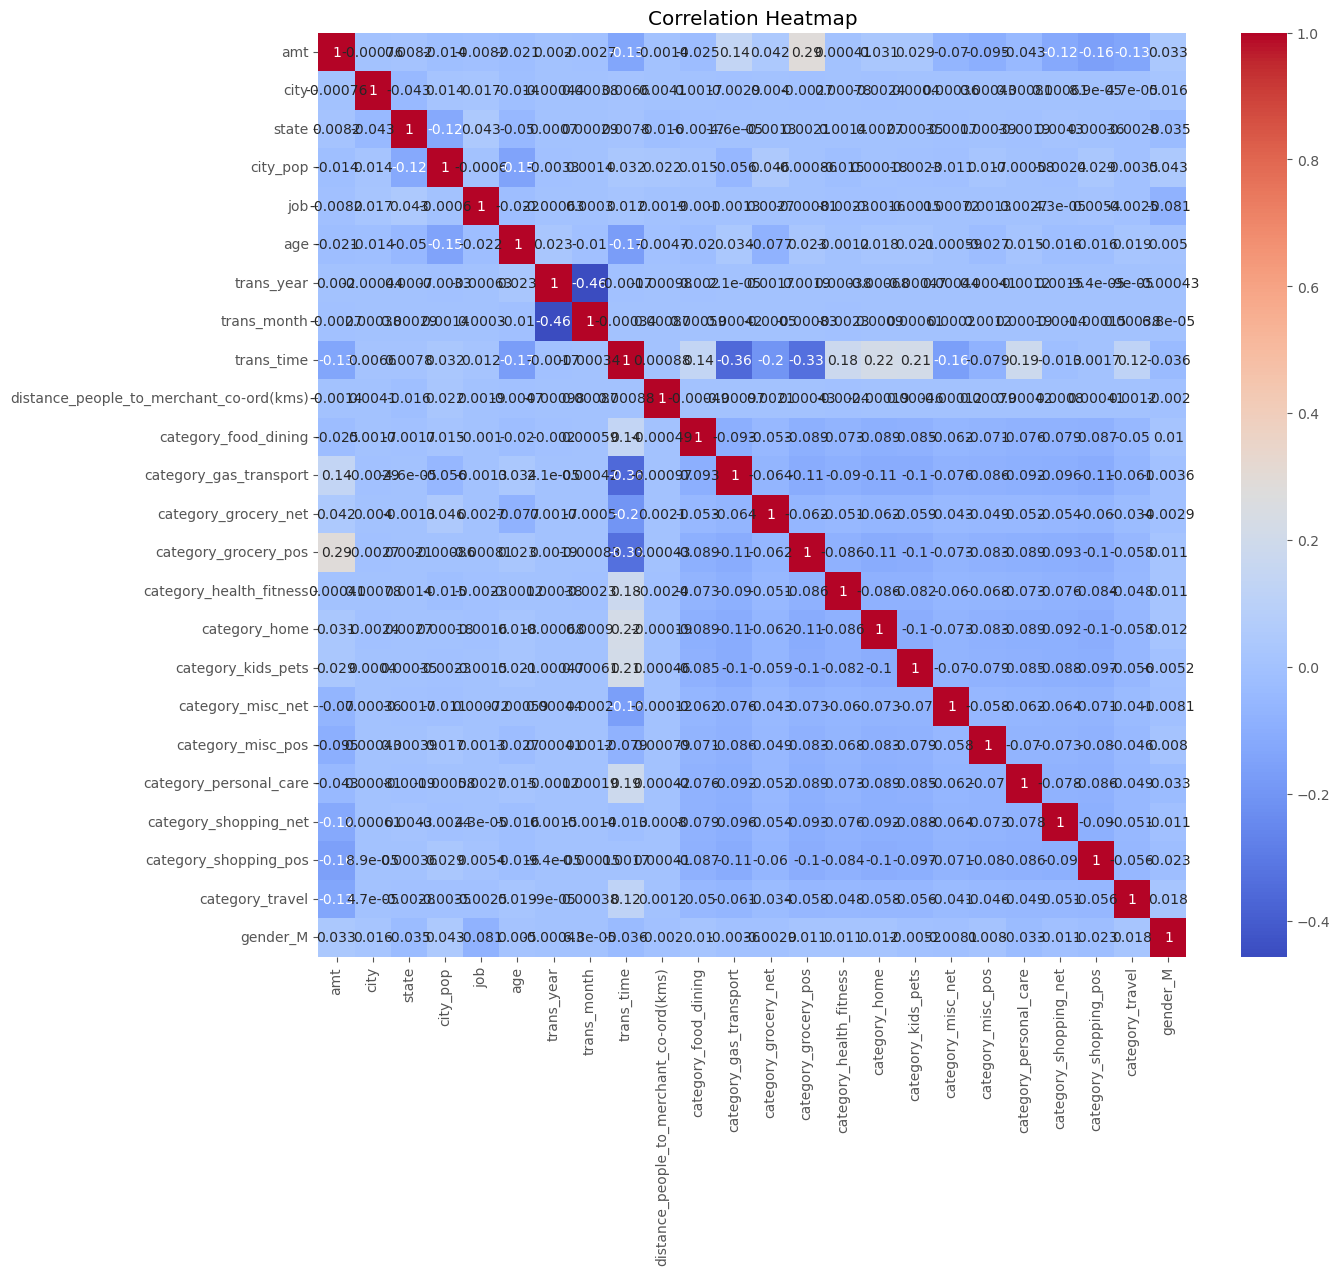

In [136]:
#Correlation Heatmap

numerical_features = X_train.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()
# Assuming you have a correlation matrix called 'correlation_matrix' with features
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix,annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

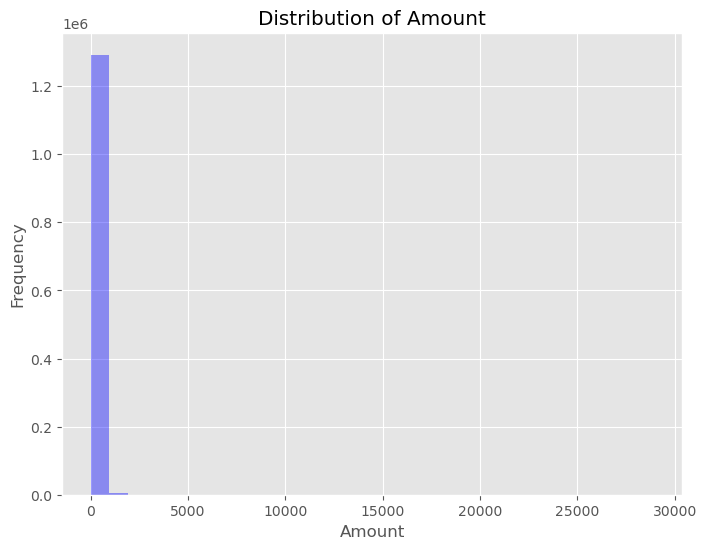

In [137]:
#Distplot

plt.figure(figsize=(8, 6))
sns.distplot(dataset_train['amt'], kde=False, bins=30, color='blue')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [138]:
# Classification Report
print(classification_report(y_valid, y_pred_classes_valid))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    386751
           1       0.27      0.89      0.41      2252

    accuracy                           0.99    389003
   macro avg       0.63      0.94      0.70    389003
weighted avg       1.00      0.99      0.99    389003



In [139]:
#Random Forest Model
#Random forest parameters

params_RF = {    
    'n_estimators': [10,15,50],
    'max_features':['sqrt',0.3],
    'max_depth': [10,50],
    'min_samples_leaf': [50,200],
    'min_samples_split' : [50,100],
    'criterion': ["gini"]
    
}

In [140]:
# Random Forest
model_RF = RandomForestClassifier(oob_score = True, random_state=23)

In [141]:
def model_fit_evaluation(model_model, params, X_train, y_train, X_test, y_test, algo=None, sampling=None):
    
    rcv = RandomizedSearchCV(model_model, params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
    rcv.fit(X_train, y_train)
    
    print('\n')
    print('best estimator : ', rcv.best_estimator_)
    print('best parameters: ', rcv.best_params_)
    print('best score: ', rcv.best_score_)
    print('\n')
    y_train_pred= (rcv.best_estimator_).predict(X_train)
    y_test_pred= (rcv.best_estimator_).predict(X_valid)
    draw_roc(y_train, y_train_pred)
    print("Training set metrics")
    print ('AUC for the {} Model {} sampling technique'.format(algo,sampling), metrics.roc_auc_score( y_train, y_train_pred))
    model_metrics(y_train, y_train_pred)
    print('*'*50)
    print("Validation set metrics")
    draw_roc(y_test, y_test_pred)
    print ('AUC for the {} Model {} sampling technique'.format(algo,sampling), metrics.roc_auc_score( y_test, y_test_pred))
    model_metrics(y_test, y_test_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  RandomForestClassifier(max_depth=50, max_features=0.3, min_samples_leaf=200,
                       min_samples_split=100, n_estimators=15, oob_score=True,
                       random_state=23)
best parameters:  {'n_estimators': 15, 'min_samples_split': 100, 'min_samples_leaf': 200, 'max_features': 0.3, 'max_depth': 50, 'criterion': 'gini'}
best score:  0.9920808887796208




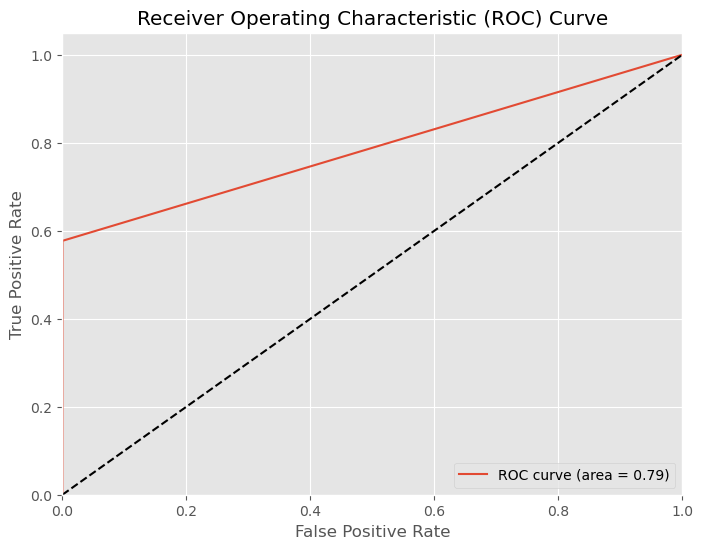

Training set metrics
AUC for the Random Forest Model No sampling sampling technique 0.7884290335296378
Accuracy    :  0.9973272283379899
Sensitivity :  0.577084126379901
Specificity :  0.9997739406793748
Precision   :  0.9369592088998764
Recall      :  0.577084126379901
F1_score: 0.7142520612485277
[[902214    204]
 [  2222   3032]]
**************************************************
Validation set metrics


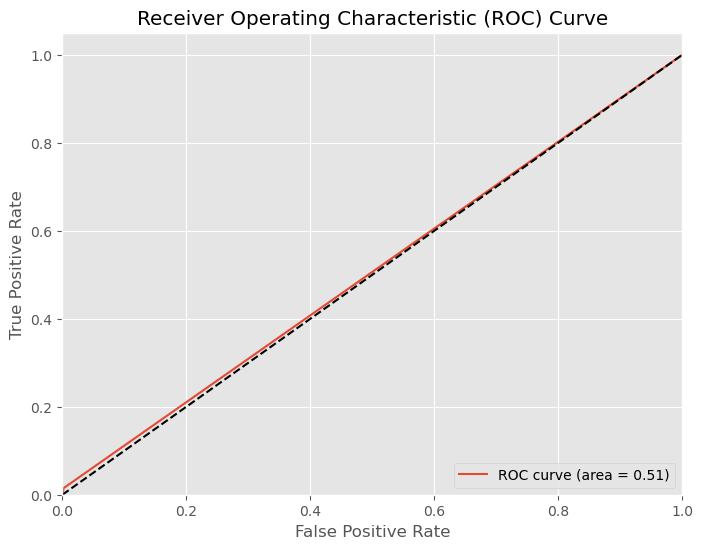

AUC for the Random Forest Model No sampling sampling technique 0.5065236380374863
Accuracy    :  0.9922596997966596
Sensitivity :  0.015097690941385435
Specificity :  0.9979495851335872
Precision   :  0.041112454655380895
Recall      :  0.015097690941385435
F1_score: 0.022085092562520295
[[385958    793]
 [  2218     34]]


In [142]:
#Random Forest without sampling
model_fit_evaluation(model_RF, params_RF, X_train, y_train, X_valid, y_valid, 'Random Forest', 'No sampling')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  RandomForestClassifier(max_depth=10, max_features=0.3, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=50, oob_score=True,
                       random_state=23)
best parameters:  {'n_estimators': 50, 'min_samples_split': 50, 'min_samples_leaf': 50, 'max_features': 0.3, 'max_depth': 10, 'criterion': 'gini'}
best score:  0.9879055203772997




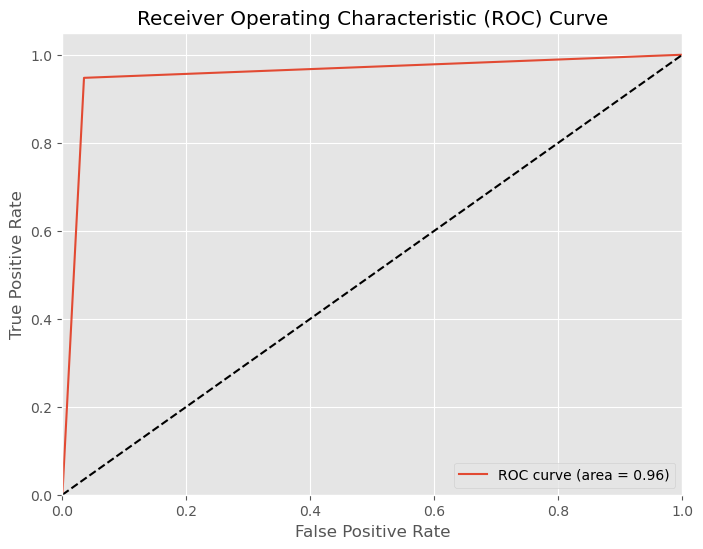

Training set metrics
AUC for the Random Forest Model under sampling sampling technique 0.9563189950513896
Accuracy    :  0.9563189950513894
Sensitivity :  0.9474685953559193
Specificity :  0.9651693947468596
Precision   :  0.9645417554737454
Recall      :  0.9474685953559193
F1_score: 0.9559289486317811
[[5071  183]
 [ 276 4978]]
**************************************************
Validation set metrics


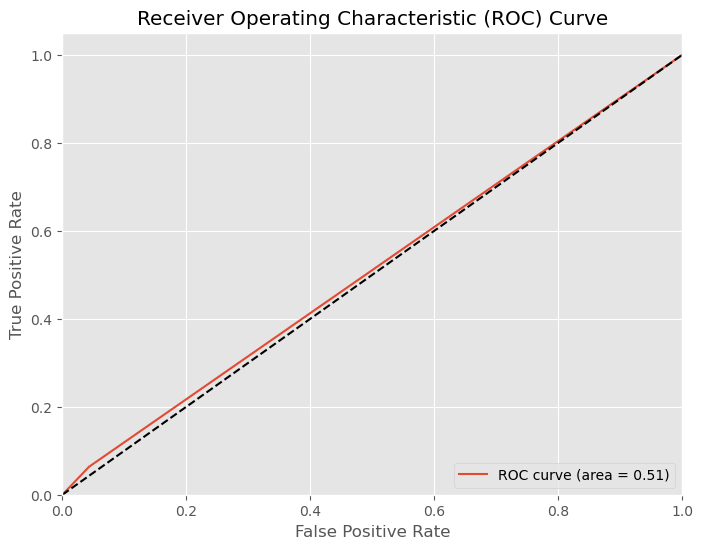

AUC for the Random Forest Model under sampling sampling technique 0.5102925978557818
Accuracy    :  0.9519129672521806
Sensitivity :  0.06349911190053285
Specificity :  0.9570860838110309
Precision   :  0.008542413381123059
Recall      :  0.06349911190053285
F1_score: 0.015058972198820556
[[370154  16597]
 [  2109    143]]


In [143]:
#Random Forest with under sampling
model_fit_evaluation(model_RF, params_RF, X_train_us, y_train_us, X_valid, y_valid, 'Random Forest', 'under sampling')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  RandomForestClassifier(max_depth=50, max_features=0.3, min_samples_leaf=200,
                       min_samples_split=100, n_estimators=15, oob_score=True,
                       random_state=23)
best parameters:  {'n_estimators': 15, 'min_samples_split': 100, 'min_samples_leaf': 200, 'max_features': 0.3, 'max_depth': 50, 'criterion': 'gini'}
best score:  0.9996243493403923




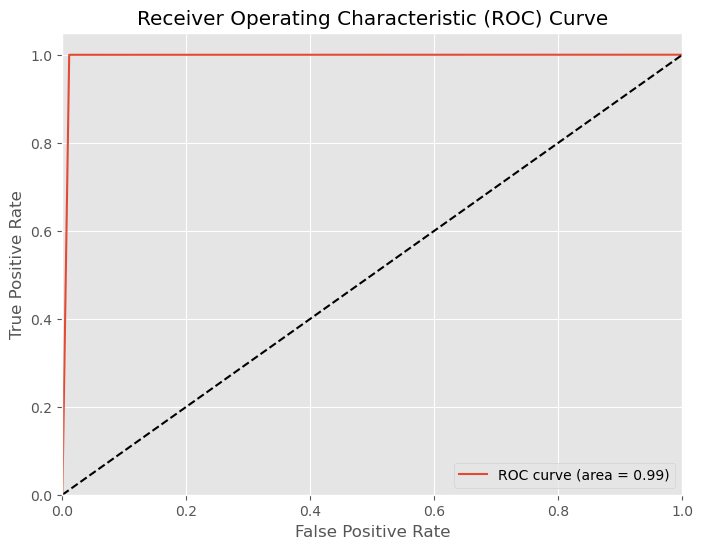

Training set metrics
AUC for the Random Forest Model over sampling sampling technique 0.9944227619573192
Accuracy    :  0.9944227619573192
Sensitivity :  0.9998193741702848
Specificity :  0.9890261497443535
Precision   :  0.9891433282391866
Recall      :  0.9998193741702848
F1_score: 0.9944526985918474
[[892515   9903]
 [   163 902255]]
**************************************************
Validation set metrics


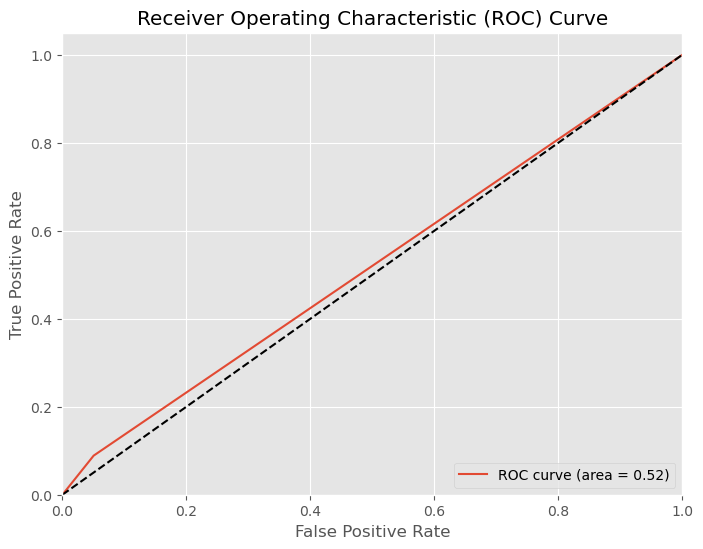

AUC for the Random Forest Model over sampling sampling technique 0.5192195181157885
Accuracy    :  0.9446456711130763
Sensitivity :  0.08880994671403197
Specificity :  0.9496290895175449
Precision   :  0.01016208525989533
Recall      :  0.08880994671403197
F1_score: 0.018237359230383443
[[367270  19481]
 [  2052    200]]


In [144]:
#Random Forest with over sampling
model_fit_evaluation(model_RF, params_RF, X_train_ro, y_train_ro, X_valid, y_valid, 'Random Forest', 'over sampling')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  RandomForestClassifier(max_depth=50, max_features=0.3, min_samples_leaf=200,
                       min_samples_split=100, n_estimators=15, oob_score=True,
                       random_state=23)
best parameters:  {'n_estimators': 15, 'min_samples_split': 100, 'min_samples_leaf': 200, 'max_features': 0.3, 'max_depth': 50, 'criterion': 'gini'}
best score:  0.9991029629009855




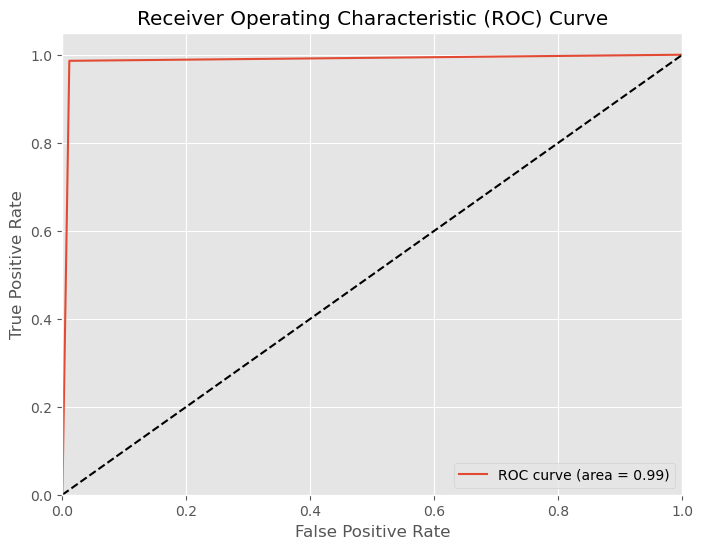

Training set metrics
AUC for the Random Forest Model SMOTE sampling technique 0.9874924923926606
Accuracy    :  0.9874924923926606
Sensitivity :  0.986151650343854
Specificity :  0.9888333344414673
Precision   :  0.9888033084517965
Recall      :  0.986151650343854
F1_score: 0.9874756992836282
[[892341  10077]
 [ 12497 889921]]
**************************************************
Validation set metrics


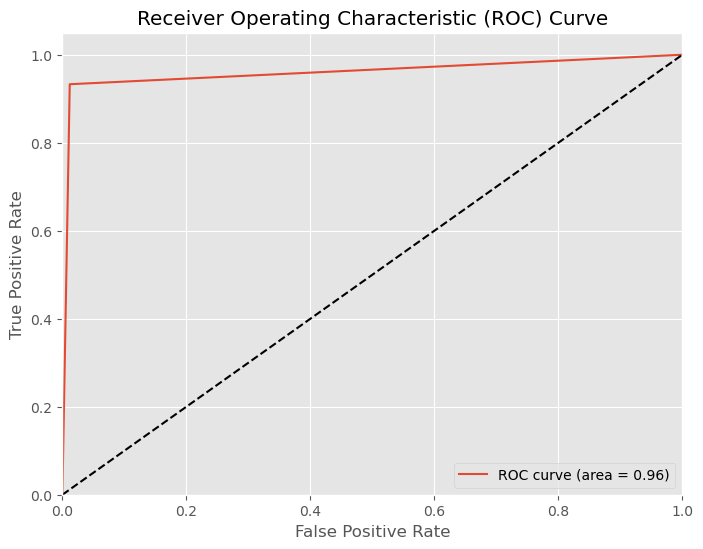

AUC for the Random Forest Model SMOTE sampling technique 0.9605570012039957
Accuracy    :  0.9878458520885443
Sensitivity :  0.9329484902309059
Specificity :  0.9881655121770855
Precision   :  0.31461515423779574
Recall      :  0.9329484902309059
F1_score: 0.4705487122060471
[[382174   4577]
 [   151   2101]]


In [145]:
#Random Forest with SMOTE
model_fit_evaluation(model_RF, params_RF, X_train_smote, y_train_smote, X_valid, y_valid, 'Random Forest', 'SMOTE')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  RandomForestClassifier(max_depth=50, max_features=0.3, min_samples_leaf=200,
                       min_samples_split=100, n_estimators=15, oob_score=True,
                       random_state=23)
best parameters:  {'n_estimators': 15, 'min_samples_split': 100, 'min_samples_leaf': 200, 'max_features': 0.3, 'max_depth': 50, 'criterion': 'gini'}
best score:  0.9976572921923997




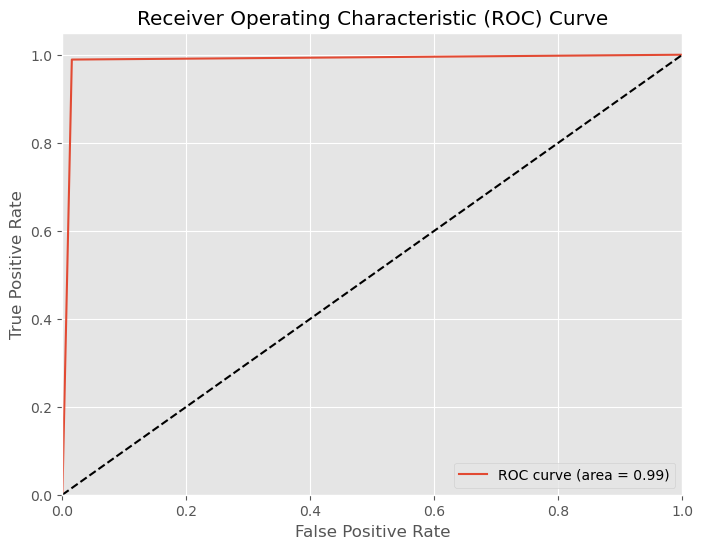

Training set metrics
AUC for the Random Forest Model ADASYN sampling technique 0.9868937941397132
Accuracy    :  0.9868941566596442
Sensitivity :  0.9889845369218516
Specificity :  0.9848030513575748
Precision   :  0.9848715004175396
Recall      :  0.9889845369218516
F1_score: 0.9869237333852154
[[888704  13714]
 [  9944 892787]]
**************************************************
Validation set metrics


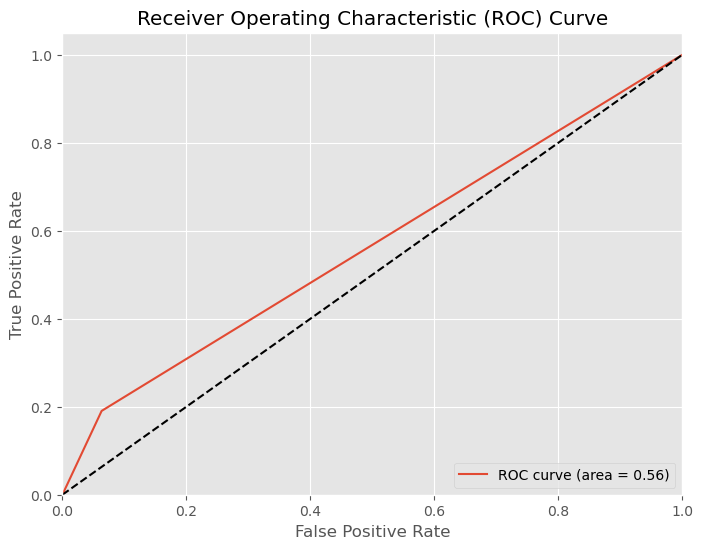

AUC for the Random Forest Model ADASYN sampling technique 0.5636068621411825
Accuracy    :  0.9323964082539209
Sensitivity :  0.19049733570159857
Specificity :  0.9367163885807664
Precision   :  0.017226148409893994
Recall      :  0.19049733570159857
F1_score: 0.03159522757401679
[[362276  24475]
 [  1823    429]]


In [146]:
#Random Forest with ADASYN
model_fit_evaluation(model_RF, params_RF, X_train_ada, y_train_ada, X_valid, y_valid, 'Random Forest', 'ADASYN')

In [147]:
#Performing the model evaluation
scaler=PowerTransformer()
dataset_train[['amt','city_pop','distance_people_to_merchant_co-ord(kms)','trans_year','trans_time','city', 'state','job','trans_month','age']] = scaler.fit_transform(dataset_train[['amt','city_pop','distance_people_to_merchant_co-ord(kms)','trans_year','trans_time','city', 'state','job','trans_month','age']])



dataset_train_X=dataset_train.drop('is_fraud',axis=1)
dataset_train_y=dataset_train['is_fraud']

smk = SMOTE(sampling_strategy='minority', random_state=40)
ada = ADASYN(sampling_strategy='minority', random_state=40)
ro = over_sampling.RandomOverSampler(sampling_strategy='minority',random_state=100)
us= under_sampling.RandomUnderSampler(sampling_strategy='majority',random_state=100)
X_train_ro, y_train_ro = ro.fit_resample(dataset_train_X, dataset_train_y)
X_train_smk, y_train_smk = smk.fit_resample(dataset_train_X, dataset_train_y)
X_train_ada, y_train_ada = ada.fit_resample(dataset_train_X, dataset_train_y)
X_train_us, y_train_us = us.fit_resample(dataset_train_X, dataset_train_y)

dataset_test_X=dataset_test.drop('is_fraud',axis=1)
dataset_test_y=dataset_test['is_fraud']

In [148]:
# Random forest
model_RF = RandomForestClassifier(oob_score = True, random_state=40)

#Random forest parameters
params_RF = {    
    'n_estimators': [10,15,50],
    'max_features':['sqrt',0.3],
    'max_depth': [10,50],
    'min_samples_leaf': [50,200],
    'min_samples_split' : [50,100],
    'criterion': ["gini"]
    
}

rcv1 = RandomizedSearchCV(model_RF, params_RF, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=40)
rcv1.fit(X_train_ro, y_train_ro)
rcv1.best_estimator_
y_train_pred= (rcv1.best_estimator_).predict(X_train_ro)
y_test_prob1=(rcv1.best_estimator_).predict_proba(dataset_test_X)[:,1]
y_test_pred1=(rcv1.best_estimator_).predict(dataset_test_X)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Training set


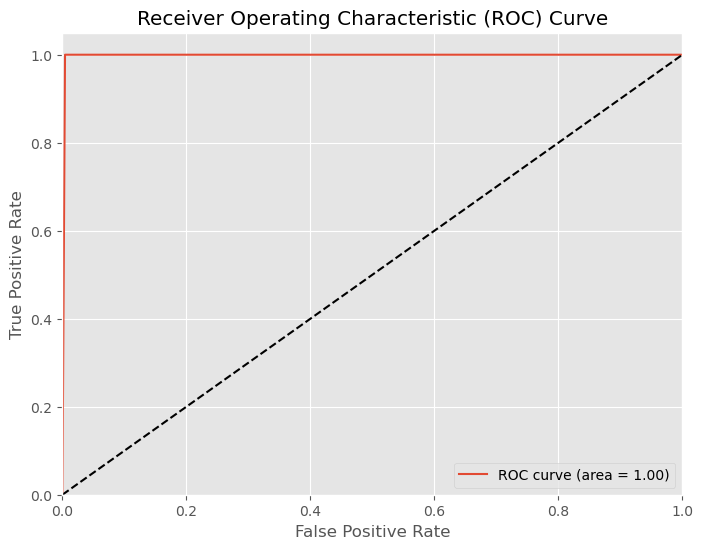

AUC for the Random Forest Model Over sampling technique 0.9978936043296107
Accuracy    :  0.9978936043296108
Sensitivity :  1.0
Specificity :  0.9957872086592215
Precision   :  0.9958048818167774
Recall      :  1.0
F1_score: 0.997898031906103
[[1283738    5431]
 [      0 1289169]]
**************************************************
Testing set


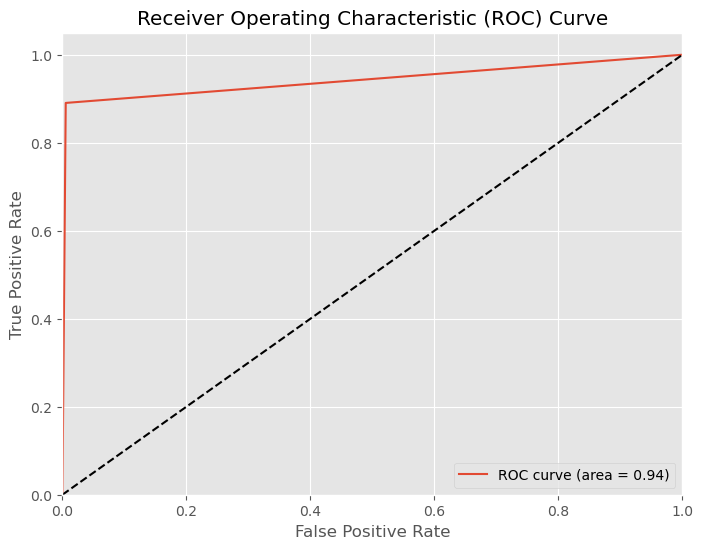

AUC for the Random Forest Over sampling technique 0.9425415867020784
Accuracy    :  0.9942380951524061
Sensitivity :  0.8904428904428905
Specificity :  0.9946402829612663
Precision   :  0.39163420135329097
Recall      :  0.8904428904428905
F1_score: 0.5440045571062375
[[550607   2967]
 [   235   1910]]


In [149]:
print("Training set")
draw_roc(y_train_ro, y_train_pred)
print ('AUC for the Random Forest Model Over sampling technique', metrics.roc_auc_score(y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)
print('*'*50)
print("Testing set")
draw_roc(dataset_test_y, y_test_pred1)
print ('AUC for the Random Forest Over sampling technique', metrics.roc_auc_score(dataset_test_y, y_test_pred1))
model_metrics(dataset_test_y, y_test_pred1)

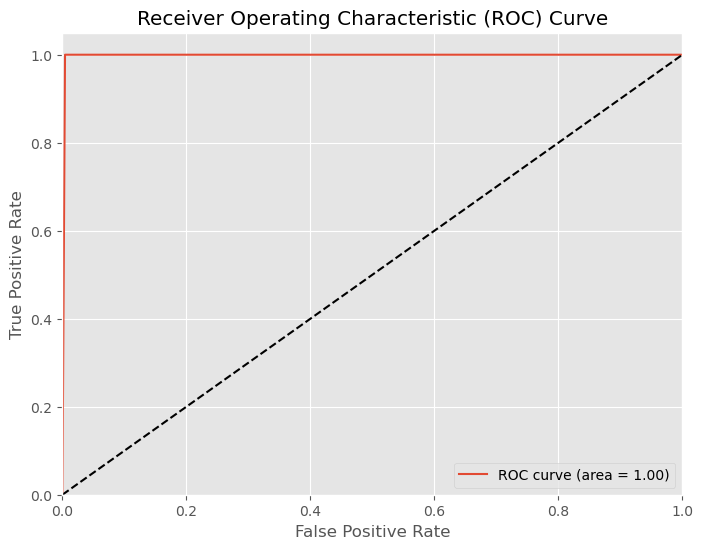

AUC for the Random Forest  0.9978936043296107
Accuracy    :  0.995811595041163
Sensitivity :  1.0
Specificity :  0.9957872086592215
Precision   :  0.5801963360902836
Recall      :  1.0
F1_score: 0.7343344910238223
[[1283738    5431]
 [      0    7506]]


In [150]:
#Applying the finalised model on training set with out sampling
y_train_pred1= (rcv1.best_estimator_).predict(dataset_train_X)
draw_roc(dataset_train_y, y_train_pred1)
print ('AUC for the Random Forest ', metrics.roc_auc_score(dataset_train_y, y_train_pred1))
model_metrics(dataset_train_y, y_train_pred1)

In [151]:
# Extracting the features significance

imp_df = pd.DataFrame({
    "Varname": X_train_ro.columns,
    "Imp": rcv1.best_estimator_.feature_importances_})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amt,0.566028
8,trans_time,0.198514
11,category_gas_transport,0.025040
5,age,0.024016
13,category_grocery_pos,0.021293
20,category_shopping_net,0.020340
3,city_pop,0.015866
4,job,0.011650
1,city,0.011608
9,distance_people_to_merchant_co-ord(kms),0.011252
